Re-doing some data exploration and pre-processing (Round 2)
This Notebook is based on the dataset compiled Andreas. It comprises years 2010 until 2023 and the entire EU.
It will contain less first visualizations, as these were already done and presented in the first report. 
This notebook aims at finishing feature engineering and having a dataset ready for ML

# Importing Libraries and Loading the Data

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# reading the file
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\EU all_dtypes_Tan_NaN_float32.parquet')

display(df.head(10))
#display(df.describe())

# Missing values summary for the whole dataset (2010-2023) also showing data types 

total_rows = df.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
results_df = pd.DataFrame({'Column Type': df.dtypes, 'Missing Percentage': missing_percentage})

# Print the results
print(results_df)

ID Country  VFN              Mp              Mh  \
0  280060.0      UK  NaN             NaN         UNKNOWN   
1  280060.0      GB  NaN             NaN         AUDI AG   
2  280060.0      PL  NaN     VW GROUP PC      VOLKSWAGEN   
3  280060.0      HU  NaN             NaN  HYUNDAI ASSAN    
4  280060.0      HU  NaN  GENERAL MOTORS            OPEL   
5  280060.0      GB  NaN     VW GROUP PC      VOLKSWAGEN   
6  280061.0      UK  NaN             NaN         UNKNOWN   
7  280061.0      GB  NaN             NaN         AUDI AG   
8  280061.0      PL  NaN     VW GROUP PC      VOLKSWAGEN   
9  280061.0      HU  NaN  GENERAL MOTORS            OPEL   

                                Man         MMS                  Tan  \
0                           UNKNOWN    VAUXHALL                  NaN   
1                               NaN        AUDI                  NaN   
2                     VOLKSWAGEN AG         NaN  e1*2001/116*0211*27   
3  HYUNDAI ASSAN OTOMOTIV SANAYI VE     Hyundai  e11*2007/46*0192*04   
4                      ADAM OPEL AG        Opel   e1*2007/46*0374*14   
5                     VOLKSWAGEN AG  VOLKSWAGEN  e1*2001/116*0471*20   
6                           UNKNOWN    VAUXHALL                  NaN   
7                               NaN        AUDI                  NaN   
8                     VOLKSWAGEN AG         NaN  e1*2001/116*0211*28   
9                      ADAM OPEL AG        Opel   e1*2007/46*0374*14   

             T       Va                       Ve              Mk  \
0  A-H/MONOCAB     BF11              2A05ASXEGA7        VAUXHALL   
1           B8  LCAKAQ1      QM6B4006R8K927MGEM0            AUDI   
2           1T   CFHCAF  FD6FD62E0187MQS7N1VR0S0      VOLKSWAGEN   
3          ELH    F5D31                   M65AZ1  HYUNDAI ASSAN    
4         0G-A  CAHBC12               BA1N1FMHD5            Opel   
5           13   ADCUUB  FM6FM62Q0257MMVR2N1RL62      VOLKSWAGEN   
6  A-H/MONOCAB     BG11              1A07ANBABG7        VAUXHALL   
7           B8  LCAKAW1      QD7B5007R8K927MGEM0            AUDI   
8           1T   CFHCAF  FD6FD62E0187MQS7N1VR0S0      VOLKSWAGEN   
9         0G-A  CAHBC12               BA1N4FMHA5            Opel   

                             Cn  Ct   Cr     r  m (kg)  Mt  Enedc (g/km)  \
0      ZAFIRA SRI XP 150 CDTI A  M1  NaN  14.0  1613.0 NaN         191.0   
1                  S4 T QUATTRO  M1  NaN   3.0  1735.0 NaN           NaN   
2                        TOURAN  M1  NaN   1.0  1629.0 NaN         131.0   
3                          ix35  M1  NaN   1.0  1500.0 NaN         139.0   
4         Insignia Limousine HB  M1  NaN   4.0  1613.0 NaN         114.0   
5  SCIROCCO BLUEMOTION TECH TDI  M1  NaN   5.0  1375.0 NaN         109.0   
6                 ZAFIRA ACTIVE  M1  NaN  30.0  1503.0 NaN         177.0   
7             S4 T QUATTRO AUTO  M1  NaN   1.0  1775.0 NaN           NaN   
8                        TOURAN  M1  NaN   2.0  1629.0 NaN         149.0   
9         Insignia Limousine HB  M1  NaN   1.0  1613.0 NaN         114.0   

   Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft Fm  ec (cm3)  ep (KW)  \
0           NaN  2703.0    1488.0    1512.0  diesel  M    1910.0      NaN   
1           NaN     NaN       NaN       NaN  petrol  M    2995.0      NaN   
2           NaN  2675.0    1794.0    1794.0  DIESEL  M    1968.0    103.0   
3           NaN  2640.0    1585.0    1586.0  Diesel  M    1685.0     85.0   
4           NaN  2737.0    1587.0    1590.0  Diesel  M    1956.0    120.0   
5           NaN  2575.0    1552.0    1558.0  diesel  M    1968.0      NaN   
6           NaN  2703.0    1488.0    1512.0  petrol  M    1796.0      NaN   
7           NaN     NaN       NaN       NaN  petrol  M    2995.0      NaN   
8           NaN  2675.0    1535.0    1535.0  DIESEL  M    1968.0    103.0   
9           NaN  2737.0    1587.0    1590.0  Diesel  M    1956.0    120.0   

   z (Wh/km)   IT  Ernedc (g/km)  Erwltp (g/km)  De  Vf Status    year  \
0        NaN  NaN            NaN            NaN

                      Column Type  Missing Percentage
ID                        float32            0.000000
Country                  category            0.000000
VFN                      category           41.697914
Mp                       category           10.652075
Mh                       category            0.000000
Man                      category            2.151717
MMS                      category           41.877526
Tan                      category            3.396455
T                        category            0.429536
Va                       category            0.695738
Ve                       category            1.559415
Mk                       category            0.297089
Cn                       category            0.341831
Ct                       category            0.170943
Cr                       category           19.463328
r                         float32            0.000028
m (kg)                    float32            0.097453
Mt                        fl

In [11]:
# Missing values summary for a portion of data dataset (2019-2023) also showing data types

# Filter data from 2019 to 2023
df_filtered = df[df['year'].between(2019, 2023)]

# Create a dataframe to show data types and missing percentage
missing_data_summary = pd.DataFrame({
    'DataType': df_filtered.dtypes,
    'MissingPercentage': df_filtered.isna().mean() * 100
})

# Show the missing percentage and data types
print(missing_data_summary)

                       DataType  MissingPercentage
ID                      float32           0.000000
Country                category           0.000000
VFN                    category          19.141313
Mp                     category           5.165531
Mh                     category           0.000000
Man                    category           0.000010
MMS                    category          54.682403
Tan                    category           0.370706
T                      category           0.061537
Va                     category           0.361618
Ve                     category           0.956688
Mk                     category           0.013173
Cn                     category           0.328235
Ct                     category           0.073449
Cr                     category           0.000000
r                       float32           0.000000
m (kg)                  float32           0.034594
Mt                      float32           4.779599
Enedc (g/km)            float32

# 1- Preprocessing - Variables' definition and first clean up 

Variables definitions are mostly based on the following docs:

- Guidelines on the monitoring and reporting of CO2 emissions from light-duty vehicles (Source: https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019)
- REGULATION EU 2019_631 (Source: https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32019R0631)

When referring to missing values, I am referencing the missing data summary provided above for the entire dataset. 

Explanations, codes below:

- ID: This identify the data entry (row) in the data set. It is irrelevant for ml and it will be removed.

- Country or member state: Self-explanatory. It will kept.

- VFH (Vehicle family identification number)* 

The Vehicle Family Identification Number, or VFID, is used to identify a group of vehicles that share common characteristics such as engine type, transmission type, and emissions controls. The VFID is not unique to a single vehicle but refers to a vehicle family. The VFID is used mainly in regulatory contexts, particularly for emissions testing and certification. A vehicle family groups together vehicles that are considered to be equivalent in terms of their environmental performance, allowing manufacturers to test and certify a representative vehicle from the family rather than testing every individual vehicle. Vehicles in the same family share key features that affect their emissions, such as the engine, transmission, and emission control systems. Manufacturers can submit test results for one representative vehicle from the family to satisfy regulatory requirements for the entire family.

Use Cases:

- Emissions certification: Under the Worldwide Harmonized Light Vehicles Test Procedure (WLTP) and Real Driving Emissions (RDE) tests, vehicle families are used to streamline testing and certification processes.
- Type approval: In the EU, manufacturers obtain type approval for a vehicle family rather than for every individual model, simplifying compliance with emissions standards.
- Regulatory reporting: Manufacturers report data for vehicle families to meet CO₂ emissions and fuel consumption targets.

This variable will be kept. 

Note: The Vehicle Identification Number (VIN) Identifies individual vehicles. 

"With WLTP, a specific CO2 emission value is calculated and recorded in the certificate of conformity (CoC) of each individual vehicle. In order to effectively monitor and verify those values, vehicle identification numbers (VINs) have to be used as a basis for the monitoring. This means that for the 2019 data, in addition to the NEDC CO2 emissions, also the WLTP CO2 emissions should be reported for all cars (except end-of-series cars registered before 1 September 2019) and for most vans."

We dont have access to the VIN, since "The vehicle identification number referred to in point (o) of point 1.1 shall not be made public." (REGULATION EU 2019_631)

- Mp (Manufactures pool):

EU rules require automotive manufacturers to limit carbon dioxide (CO2) emissions from their vehicles. The limits apply to the average emissions of a manufacturer’s entire fleet, rather than individual vehicles. Manufacturers who make vehicles with higher CO2 emissions can offset these emissions by pooling with other manufacturers.These are currently set out in Regulation (EU) 2019/631, which applies to both passenger cars and light commercial vehicles.All manufacturers must ensure that the average CO2 emissions of their vehicle fleets do not exceed the set limit. This is currently around 95g of CO2 per km (CO2/km) for cars and 147g CO2/km for light commercial vehicles.In order to make it easier for manufacturers to comply with the fleet targets, they can join forces in ‘pools’. All manufacturers in a pool are then viewed as a single manufacturer for the purposes of CO2 emissions regulation, allowing manufacturers with low fleet emissions to offset the high fleet emissions of other manufacturers.

This variable will be kept. 

- Mh, Man, MMS and Mk: 

The four columns represent manufacturer names from different contexts (see for example row 4, Opel, above):
Mh (EU standard denomination): This is the manufacturer name according to the European Union's standardized naming conventions. The EU often enforces consistency across member states for legal and regulatory purposes.
Man (Original Equipment Manufacturer - OEM): This is the name of the original equipment manufacturer, i.e., the company that produces the vehicle. This may differ slightly from the EU standard name (using abbreviations, special characters, or different languages).
Manufacturer name - MMS (MS registry denomination): This is the manufacturer name according to the Member State (MS) registry. Each EU country may have its own format or name variant for a manufacturer in its local registry.

Only one will be needed. Decision rules are the following:

1- Data-driven: check for matches 
2- Data-driven: Keep the variable with the least missing values. 
3- Common-sense-driven: Since it is an EU dataset, keep only Mh (EU standard denomination).
    
Explanation: 

As expected, single-word matches (highly probably the main auto manufacturer name - see code below) is high between Mh and Man and Mk. Only 47.8% between Mh and MMS. 

Mh vs Man word match: 95.67%
Mh vs MMS word match: 47.80%
Mh vs Mk word match: 80.78%

On the other hand, MMS (MS registry denomination), has 41% of missing values accross the whole dataset (see total missing percentage above). Mh has zero missing values.

Based on these considerations, only Mh will be kept, and Man, MMS, Mk will be dropped. 

- TAN, T, Va, Ve (and Mk?): 

They along with VFN are grouped as "Vehicle identifiers": Here is the individual meaning:

The Type, Variant and Version entries are set out in section 0.2 of the certificate of conformity (A certificate of conformity, or CoC, is issued by an authorized party (sometimes the manufacturer, sometimes an independent laboratory) and states that the product meets the required standards or specification).

- TAN - Type-approval number and its extension: 

Type approval describes the process applied by national authorities to certify that a model of a vehicle meets all EU safety, environmental and conformity of production requirements before authorising it to be placed on the EU market. If all relevant requirements are met, the national authority delivers an EU vehicle type approval to the manufacturer authorising the sale of the vehicle type in the EU. 

The letters and numbers at the beginning of the EC type-approval number, such as e1*, e2*, or e9*, have specific meanings. They indicate the country in which the type approval was granted. The EC type-approval number consists of several parts that not only indicate the country of approval but also specific approval information, the directives under which the vehicle was approved, and an individual number assigned to the vehicle type

This number may look like: e13*2001/116*0260 where e13 is the UNECE state number (in this case Luxembourg), 2001/116 is the EC/EU directive name.

Type (T): Altough entries are not consistent accross the dataset, many entries seem to follow the ACEA classifications: A and B (small cars), C and D (lower medium), E and F (Luxury), S (sport), J (SUVs), M (Multipurpose) (see: https://alternative-fuels-observatory.ec.europa.eu/general-information/vehicle-types)

See for example rows 0 and 4, column type: A-H/MONOCAB and 0G-A(Year 2010 and 2014)

For category M1,  A ‘vehicle type’ shall consist of vehicles which have all of the following features in common:  
 the manufacturer’s company name 
 the design and assembly of the essential parts of the body structure in  
 in the case of multi-stage built vehicles, the manufacturer and the type  
 of the previous stage vehicle. 


A ‘variant’ within a vehicle type shall group the vehicles which have all of the following 
construction features in common:  
 the number of lateral doors or the type of bodywork  
 The power plant as regards energy supply(electric, combustion), working 
 principle (positive/compression ignition), number and arrangement of cylinders 
 The number of axles, powered axles, steered axles and there interconnection 
 The stage of completion (e.g. complete/incomplete) 


A ‘version’ within a variant shall group the vehicles which have all the following features in common: 
 max laden mass, engine capacity, power output, fuel, number of seats, sound level, 
 exhaust emission levels and fuel consumption 


That means, first, that Type, Variant and Version belong togehter for each individual car. 

What does the data show?

The results indicate that a large percentage of values in the Tan, T, and Va columns are repetitive (considering also that at this stage only one row in the data set appears to be a duplicate (see codes below)).

Tan: Approximately 34.56% of the values are unique, meaning that over 65% of the values are repeated.
T: Approximately 18.43% of the values are unique, indicating a high degree of repetition.
Va: Approximately 50.22% of the values are unique, suggesting a moderate level of repetition.
Ve: Approximately 126.46% of the values are unique. This seems unusual and might indicate an error in the data or calculation. It's possible that there are duplicate rows or errors in the data that are causing this high percentage.

I cannot explain why, if all these four variables (TVV) are so repetitive, if they would represent together uniques values for each car.
Another factor to consider is that legislation have changed over the years pertaining the way in which data is entered and reported. 

The important question, however, from a ml standpoint, do we need all vehicle identifiers?

Options: 
1- Get only the types and drop the rest. 
2- Concatenate these variables and check how many uniques are them.

This will be handled later. 

Commercial name(Cn): Another vehicle identifier. The variable will be kept. 

- Category of vehicle type approved (Ct) and Category of vehicle registered (Cr)   

The vehicle category type approved (M1, N1 etc.) is set out in the certificate of conformity. It should be noted that a vehicle may be type approved in one category and registered in another (see BD-067-Guidelines-to-Manufacturers-for-reporting-errors) 

According UNECE categories (see https://en.wikipedia.org/wiki/Vehicle_category)

M1: Vehicles used for carriage of passengers, comprising not more than eight seats in addition to the driver's = 9
N1: Power-driven vehicles having at least four wheels and used for the carriage of goods (not exceeding 3.5 tonnes)

These two types are the ones contained in the entire dataset. 

Now, the percentage of positive matches between Ct and Cr = 79.17%, but Cr has an almost 20% of missing data. This would suggest to keep Ct. However, it is the vehicle category registered that determines whether a vehicle is considered as M1 or N1 for the purpose of the CO2 emission standards. Given that I will keep only Cr and handle later the 20 % of missing data.

- Total of number registrations (r): This is motor vehicle registrations in the EU. 

According to guidelines 2019(2020) "Following the introduction of the VIN based data monitoring, the data entry for this field will by default be '1' since each vehicle will be reported separately" 

"With WLTP, a specific CO2 emission value is calculated and recorded in the certificate of conformity (CoC) of each individual vehicle. In order to effectively monitor and verify those values, vehicle identification numbers (VINs) have to be used as a basis for the monitoring. This means that for the 2019 data, in addition to the NEDC CO2 emissions, also the WLTP CO2 emissions should be reported for all cars (except end-of-series cars registered before 1 September 2019) and for most vans."

Now, we dont have access to the VIN, since "The vehicle identification number referred to in point (o) of point 1.1 shall not be made public." (REGULATION EU 2019_631) 

If the identification of indiviudal vehicles turns out to be important in later analysis, a proxy for VIN could be a concatenation of TVV (Type, Variant, Version). Probably including with commercial name

- Mass in running order (m): This is the total weight of a vehicle when it's empty and ready to be used on the road without carrying any passengers, goods or other items. It will be retained
- WLTP test mass (MT): This is the total weight of a vehicle + some added weight (passengers, cargo, etc) as to make the testing more accurate. It bill be retained.
 
- Enecd and WLTP co2 emissions: Target variable(s)

Enecd was the old way from the 80s up to 2017, when WLTP as introduced. It makes sense to probably work with only the newest WLTP.

- Wheelbase (w), At1 and At1:

Whelbase is the distance between the front and rear axles of a vehicle. At1 and At2 are front and rear access of the vehicle measured in milimeters. These three variables are known as the "Footprint". They will be retained.

- Fuel type (Ft): It will be retained. Entries: Petrol, Diesel, LGP, NG, Hydrogen, LPG, NG-biomethane, E85, Electric. Combination with electricity: Petrol/Electric, E85/Electric, Diesel/Electric, Hydrogen/Electric
- Fuel mode (Fm): It will be retained. Permitted entries: M, B, F, E,P,H (see page 17.Guidelines)
- Ec and Ep: Engine power and Engine capacity. It will be retained. 

- Electric energy consumption (Z): This parameter allow identifying pure electric vehicles. 
  
- IT: Code for the use of eco-innovation technologies. Types are Lights,Alternators, Thermal,Kinetic, Solar, etc (see pager Eco-Innovations, 2018). However, the coding is unclear. 
- Enecd and WLTP: Emission reductions due to eco-innovations. If the variables are retained,they need to be renamed in order to avoid confusion with the target variables. 

These three variables show a great deal of missing values (90% for Z), which makes sense, since most of the vehicles are non-electric. 
Given the nature of the project, this value will be probably dropped. 

- Deviation factor (DE): 

In order to understand the DE, one has first to understand the context: 

** CO2MPAS is a vehicle simulation model for the calculation of CO2 emissions, energy, and fuel consumption from passenger cars and light commercial vehicles. It uses experimental data, retrieved from chassis dyno or on-road tests, to simulate the operation of vehicles under different operating conditions.The CO2MPAS model is able to provide the difference in CO2 emissions under the two different test procedures.

The WLTP is the new and more realistic procedure for the emission type-approval of light duty vehicles which replaces the old and outdated NEDC procedure starting from 2017. The use CO2MPAS for the purpose of correlating CO2 emissions determined on the NEDC and the WLTP is set out in Commission Implementing Regulations (EU) 2017/1152 (light commercial vehicles) and 2017/1153 (passenger cars).

The correlation of CO2 emission values is required to ensure a transition from NEDC based CO2 emission targets to targets based on WLTP emissions under Regulation (EU) 2019/631 setting out CO2 emission performance standards for light duty vehicles.

In order to ensure that the correlated NEDC values are correct, 10% of the vehicle interpolation families that are subject to a CO2MPAS simulation are randomly selected for a physical vehicle test, using the “DICE” module of 
CO2MPAS. For each such test, a deviation factor (De) should be calculated and recorded in the type approval certificate and the certificate of conformity. 

** The De expresses the deviation between the CO2 emissions determined through the physical vehicle test and the CO2 emissions declared by the manufacturer in view of the CO2MPAS simulation.

If, for one or more interpolation families of a manufacturer, the De is higher than 0.04, this triggers the calculation of a correction factor, by which the average specific CO2 emissions of the manufacturer will be multiplied. 

Verification factor (Vf): The application of a correction factor may also be triggered by the presence of a verification factor (Vf) of 1 for one or more interpolation families of a manufacturer. The Vf is recorded 
as “1” in the type approval certificate if the type approval authority finds that the input data for the correlation procedure as reported by the manufacturer were incorrect or where it has justified reasons to deem the CO2 value declared by the manufacturer to be too low. 

In the dataset over 95% of the values are missing. Both variables are probably irrelevant for the ml exercise.


- Status: This take the values, provisional (p) or final (f): Why does the dataset have only provisional?


- Year and Date of registration:

The percentage of matching years between both variables is 100.00%. I intended to keep only "year", as it has zero missing values and to drop Date of registration. However:

 "Missing records or double counting of records may occur when a vehicle is firstly registered temporarily in one Member State and then permanently registered in another.  
  The VIN-based monitoring in 2018 has demonstrated that the same vehicle can be reported by different Member States, i.e. the same VIN appears more than once in the database. 
  In order to avoid such duplications, Member States should ensure that only those registrations are reported for which the date of first registration recorded in the registration certificate falls 
 within the calendar year concerned."

 So that it makes more sense to keep the whole date of registration and deal later with missing values.    

- Fuel consumption: This variable is important will be kept. The large percentage (70%)of missing values will be handled later


- ech and RLFI: Both variables have over 90% of missing values. Their meaning is not established in the docs consulted. These columns will be dropped. 

- Electric range: The term 'range' refers to the distance an electric vehicle (EV) can cover on a single charge, starting from a fully charged battery until it is depleted. And with Z, over 85% of values are missing. 


***

           Preliminary conclusion: Using only Data from 2019 onwards: 


There was a significant change in the way CO₂ emissions for passenger vehicles were measured in Europe around 2018. The major shift was the introduction of the Worldwide Harmonized Light Vehicles Test Procedure (WLTP), which replaced the older New European Driving Cycle (NEDC) test. Starting in September 2017, the WLTP was introduced for new vehicle models, and from September 1, 2018, it became mandatory for all new cars. Altough the all indicator was still used, from 2021 onwards, specific emission targets had to be expressed in WLTP only. This is reflected in the dataset. Ewlt started to appear by 2018. The consolidation ocurred in 2019. 

These change were accompained by other measures, such as: 
VFN layout change from year 2018 (see page 13, Guidelines)
VIN base monitoring since 2018.
Variables such as total number of registrations (r) ceased to be used. 

etc. 

Given all these regulative changes, which are reflected in the dataset. It is more sensible to set the starting year by 2019. 



          Concatenation of TVV (Type, Variant, Version + Mk) into a single variable given the importance of VIN but its absence


Individual vehicles are identified via the VIN, which is also the basis for data monitoring since the introduction of WLTP (with WLTP", a specific CO2 emission value is calculated and recorded in the Coc of each invidual vehicle. In order to effectively monitor and verify those values, VINs have to be used as a basis for the monitoring" (see pag. 5, Guidelines on the monitoring..))

A consequence of this is that registrations (r) data entry is set by the default value 1. 

The VIN is, however, not public (not in the data set). So that a good proxy for identifying specific vehicles would be the concatenation of Type (T), Variant (Va), and Version (Ve). 
Hence, "These three parameters allow identifying the data relating to the same version of the vehicle delivered from different member states."




In [3]:
 # Variables expressing the manufacturer name
 # Checking for single-word matches of columns containing info about the manufacturer name

def check_manufacturer_name_word_matches(df):
    # Convert categorical columns to strings for comparison
    df['Mh'] = df['Mh'].astype(str)
    df['Man'] = df['Man'].astype(str)
    df['MMS'] = df['MMS'].astype(str)
    df['Mk'] = df['Mk'].astype(str)

    # Function to check if any word matches between two strings
    def any_word_match(str1, str2):
        set1 = set(str1.lower().split())
        set2 = set(str2.lower().split())
        return len(set1.intersection(set2)) > 0

    # Create boolean columns to check if at least one word matches
    df['Mh_vs_Man'] = df.apply(lambda x: any_word_match(x['Mh'], x['Man']), axis=1)
    df['Mh_vs_MMS'] = df.apply(lambda x: any_word_match(x['Mh'], x['MMS']), axis=1)
    df['Man_vs_MMS'] = df.apply(lambda x: any_word_match(x['Man'], x['MMS']), axis=1)

    df['Mh_vs_Mk'] = df.apply(lambda x: any_word_match(x['Mh'], x['Mk']), axis=1)
    df['Man_vs_Mk'] = df.apply(lambda x: any_word_match(x['Man'], x['Mk']), axis=1)
    df['MMS_vs_Mk'] = df.apply(lambda x: any_word_match(x['MMS'], x['Mk']), axis=1)

    # Calculate the percentage of matches for each comparison
    mh_man_match = df['Mh_vs_Man'].mean() * 100
    mh_mms_match = df['Mh_vs_MMS'].mean() * 100
    man_mms_match = df['Man_vs_MMS'].mean() * 100

    mh_mk_match = df['Mh_vs_Mk'].mean() * 100
    man_mk_match = df['Man_vs_Mk'].mean() * 100
    mms_mk_match = df['MMS_vs_Mk'].mean() * 100

    # Print the results
    print(f'Mh vs Man word match: {mh_man_match:.2f}%')
    print(f'Mh vs MMS word match: {mh_mms_match:.2f}%')
    print(f'Man vs MMS word match: {man_mms_match:.2f}%')

    print(f'Mh vs Mk word match: {mh_mk_match:.2f}%')
    print(f'Man vs Mk word match: {man_mk_match:.2f}%')
    print(f'MMS vs Mk word match: {mms_mk_match:.2f}%')

# Run the function 
check_manufacturer_name_word_matches(df)

Mh vs Man word match: 95.67%
Mh vs MMS word match: 47.80%
Man vs MMS word match: 45.29%
Mh vs Mk word match: 80.78%
Man vs Mk word match: 63.34%
MMS vs Mk word match: 39.24%


In [3]:
# Checking for number of unique values in the variable VFN

unique_tan = df['VFN'].nunique()
print(unique_tan)

29048


In [4]:
# Unique values number for each variable: Tan, T, Va and Ve
unique_tan = df['Tan'].nunique()
unique_t = df['T'].nunique()
unique_va = df['Va'].nunique()
unique_ve = df['Ve'].nunique()

# Print the results
print("Number of unique values in 'Tan':", unique_tan)
print("Number of unique values in 'T':", unique_t)
print("Number of unique values in 'Va':", unique_va)
print("Number of unique values in 'Ve':", unique_ve)

Number of unique values in 'Tan': 49909
Number of unique values in 'T': 26611
Number of unique values in 'Va': 72533
Number of unique values in 'Ve': 182640


In [5]:
# Unique values percentage for each variable: Tan, T, Va and Ve

unique_tan = df['Tan'].nunique()
unique_t = df['T'].nunique()
unique_va = df['Va'].nunique()
unique_ve = df['Ve'].nunique()

# Get the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of unique values for each variable
percentage_tan = (unique_tan / total_rows) * 100
percentage_t = (unique_t / total_rows) * 100
percentage_va = (unique_va / total_rows) * 100
percentage_ve = (unique_ve / total_rows) * 100

# Print the results
print("Percentage of unique values in 'Tan':", percentage_tan)
print("Percentage of unique values in 'T':", percentage_t)
print("Percentage of unique values in 'Va':", percentage_va)
print("Percentage of unique values in 'Ve':", percentage_ve)

Percentage of unique values in 'Tan': 0.3455633786043585
Percentage of unique values in 'T': 0.1842510783233602
Percentage of unique values in 'Va': 0.5022089911701283
Percentage of unique values in 'Ve': 1.2645754366607234


In [6]:
# Checking for duplicated rows
num_duplicates = df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

# df_no_duplicates = df.drop_duplicates()

Number of duplicates: 1


In [7]:
# Number of unique values for Ct and Cr 
 
# Get unique values for 'Ct' excluding NaN
unique_ct = df['Ct'].dropna().nunique()

# Get unique values for 'Cr' excluding NaN
unique_cr = df['Cr'].dropna().nunique()

print("Unique values in 'Ct':", unique_ct)
print("Unique values in 'Cr':", unique_cr)

Unique values in 'Ct': 16
Unique values in 'Cr': 8


In [8]:
# Checking for matches

# Ensure both columns are of string type to handle any unexpected data types
df['Ct'] = df['Ct'].astype(str)
df['Cr'] = df['Cr'].astype(str)

# Exclude rows where either 'Ct' or 'Cr' is NaN
df_filtered = df.dropna(subset=['Ct', 'Cr'])

# Check for matches between 'Ct' and 'Cr'
matches = df_filtered['Ct'] == df_filtered['Cr']

# Calculate the percentage of positive matches
percentage_matches = (matches.mean()) * 100

# Print the result
print(f'Percentage of positive matches between Ct and Cr: {percentage_matches:.2f}%')

Percentage of positive matches between Ct and Cr: 79.17%


In [18]:
# Variable r

# Get unique value counts for 'r' excluding NaN
nunique_r = df['r'].dropna().nunique()

print("Unique values in 'r':", nunique_r)



Unique values in 'r': 4890


In [10]:
# Checking correlation for the footprint variables

# Select the relevant columns
columns_to_check = ['W (mm)', 'At1 (mm)', 'At2 (mm)']

# Drop rows with any NaN values in the selected columns
df_corr = df[columns_to_check].dropna()

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix
print(correlation_matrix)


            W (mm)  At1 (mm)  At2 (mm)
W (mm)    1.000000  0.573906  0.591133
At1 (mm)  0.573906  1.000000  0.723340
At2 (mm)  0.591133  0.723340  1.000000


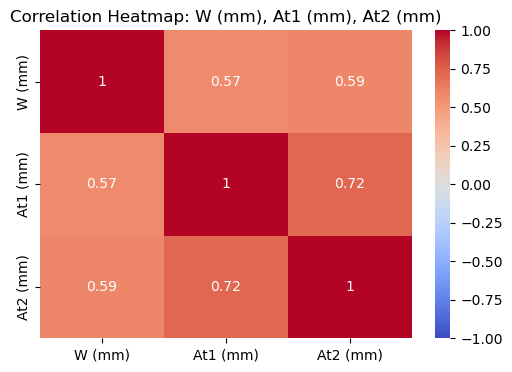

In [11]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: W (mm), At1 (mm), At2 (mm)")
plt.show()

In [4]:
# Get unique value counts for 'r' excluding NaN
unique_r = df['r'].dropna().unique()

print("Unique values in 'r':", unique_r)

Unique values in 'r': [1.400e+01 3.000e+00 1.000e+00 ... 5.458e+03 3.239e+03 3.929e+03]


In [5]:
# Get unique value counts for 'Status' excluding NaN
unique_status = df['Status'].dropna().unique()

print("Unique values in 'r':", unique_status)

Unique values in 'r': ['P']
Categories (1, object): ['P']


In [14]:
# Seeing matches in year and date of registration. Just to keep one

# Convert 'year' from float to integer (if necessary, round before conversion)
df['year'] = df['year'].dropna().astype(int)

# Convert 'Date of registration' to datetime and extract the year
df['Date of registration'] = pd.to_datetime(df['Date of registration'], errors='coerce')
df['registration_year'] = df['Date of registration'].dt.year

# Drop rows where either 'year' or 'registration_year' is NaN
df_comparison = df.dropna(subset=['year', 'registration_year'])

# Compare the 'year' and 'registration_year' columns
df_comparison['year_match'] = df_comparison['year'] == df_comparison['registration_year']

# Calculate the percentage of matching years
match_percentage = df_comparison['year_match'].mean() * 100

print(f"Percentage of matching years: {match_percentage:.2f}%")

# Optionally, print out mismatches for further inspection
mismatches = df_comparison[df_comparison['year_match'] == False]
print(f"Number of mismatches: {len(mismatches)}")
print(mismatches[['year', 'registration_year', 'Date of registration']].head())



Percentage of matching years: 100.00%
Number of mismatches: 0
Empty DataFrame
Columns: [year, registration_year, Date of registration]
Index: []


C:\Users\alexa\AppData\Local\Temp\ipykernel_12640\2575218627.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison['year_match'] = df_comparison['year'] == df_comparison['registration_year']


In [11]:
 # Missing values per country, per year

def missing_values_per_country_year(df, country_col='Country', year_col='year'):
    # Check for missing values in each column
    missing_data = df.isnull()

    # Group by country and year, and count missing values for each column
    missing_per_country_year = missing_data.groupby([df[country_col], df[year_col]]).sum()

    # Return a dataframe that shows the missing counts per country and year
    return missing_per_country_year

# Example usage
missing_values_report = missing_values_per_country_year(df)
print(missing_values_report)

C:\Users\alexa\AppData\Local\Temp\ipykernel_6344\1170408258.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_per_country_year = missing_data.groupby([df[country_col], df[year_col]]).sum()


                ID  Country     VFN     Mp  Mh    Man     MMS    Tan      T  \
Country year                                                                  
AT      2010.0   0        0   13183  12358   0      0       0  13183      1   
        2011.0   0        0   13686  13686   0  13686       0  13686      0   
        2012.0   0        0   17273   2309   0      0       0      0      0   
        2013.0   0        0   17554   2237   0      0       0      0      0   
        2014.0   0        0   28660      0   0      0       0      0      0   
        2015.0   0        0   57486   2679   0      0       0      0     58   
        2016.0   0        0   67488   3498   0      0       0      0      0   
        2017.0   0        0   26732   3193   0      0       0      0      0   
        2018.0   0        0   53185   3612   0      0       0      0      0   
        2019.0   0        0   65140   4887   0      0       0      0      0   
        2020.0   0        0      34   1506   0      

In [17]:
 # Year and country with the most missing values

def missing_values_by_year(df):
    # Find the total number of missing values per year
    missing_per_year = df.groupby('year').apply(lambda x: x.isnull().sum().sum())

    # Find the year with the most missing values
    year_with_most_missing = missing_per_year.idxmax()
    max_missing_values = missing_per_year.max()

    print(f'Year with most missing values: {year_with_most_missing} ({max_missing_values} missing values)')
    return missing_per_year

def missing_values_by_country(df):
    # Find the total number of missing values per country
    missing_per_country = df.groupby('Country').apply(lambda x: x.isnull().sum().sum())

    # Find the country with the most missing values
    country_with_most_missing = missing_per_country.idxmax()
    max_missing_values = missing_per_country.max()

    print(f'Country with most missing values: {country_with_most_missing} ({max_missing_values} missing values)')
    return missing_per_country

# Run the functions
missing_by_year = missing_values_by_year(df)
missing_by_country = missing_values_by_country(df)

# Optionally display the results
print("\nMissing values by year:")
print(missing_by_year)

print("\nMissing values by country:")
print(missing_by_country)

C:\Users\alexa\AppData\Local\Temp\ipykernel_6344\154999821.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_per_year = df.groupby('year').apply(lambda x: x.isnull().sum().sum())
C:\Users\alexa\AppData\Local\Temp\ipykernel_6344\154999821.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_per_country = df.groupby('Country').apply(lambda x: x.isnull().sum().sum())


Year with most missing values: 2019.0 (28720545 missing values)
Country with most missing values: DE (48377548 missing values)

Missing values by year:
year
2010.0     5222529
2011.0     6503321
2012.0     4947686
2013.0     6028254
2014.0     6142201
2015.0     6658445
2016.0     6861322
2017.0     6279139
2018.0    15225979
2019.0    28720545
2020.0    21473674
2021.0    18159309
2022.0    16158757
2023.0    20458272
dtype: int64

Missing values by country:
Country
AT     8796575
BE    11077399
BG     1181477
CY      409707
CZ     4544631
DE    48377548
DK     2841160
EE      894552
ES     8458221
FI     2547252
FR    12653145
GB    11703685
GR     2032373
HR      834349
HU     2732044
IE     1391007
IS      104061
IT    11907109
LT      958896
LU     3334553
LV      704175
MT      538788
NL     5468327
NO      703392
PL     8499326
PT     2469680
RO     2471106
SE     4842439
SI     1863555
SK     3366966
UK     1131935
dtype: int64


C:\Users\alexa\AppData\Local\Temp\ipykernel_6344\154999821.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_per_country = df.groupby('Country').apply(lambda x: x.isnull().sum().sum())


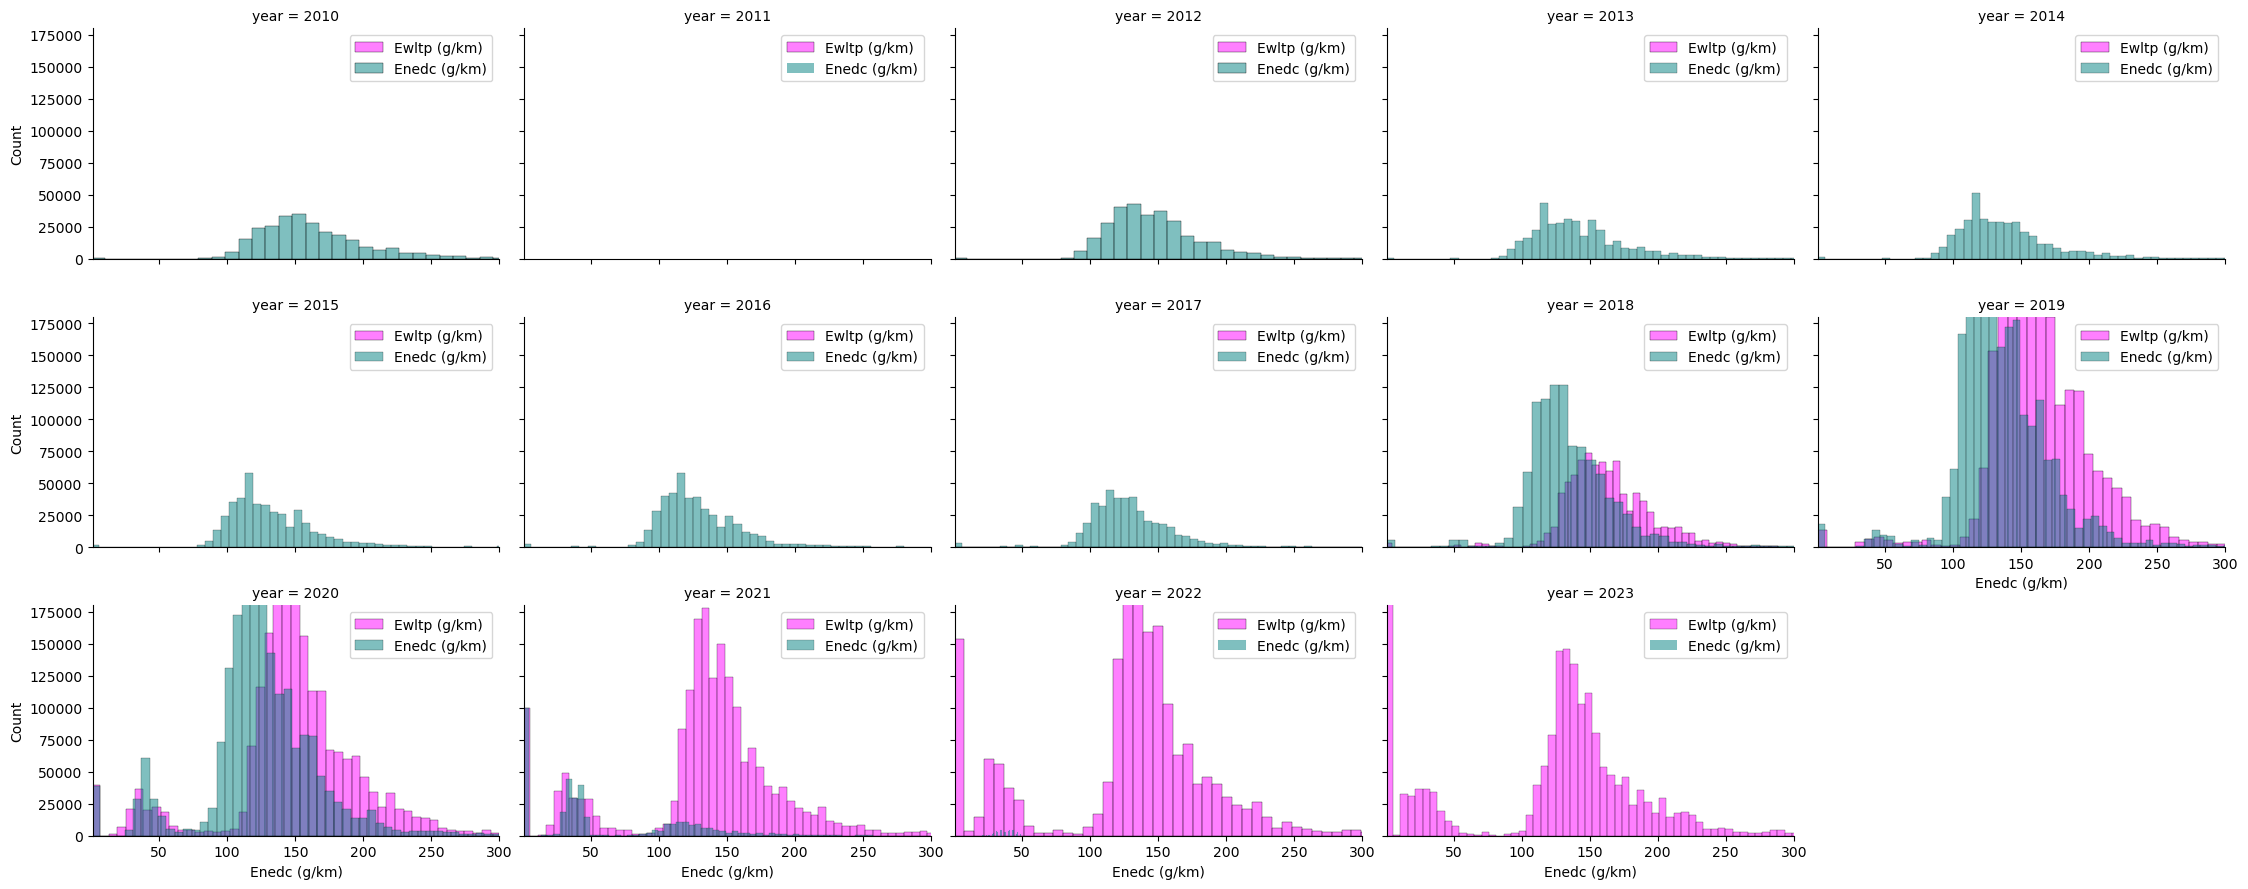

In [15]:
# Visualizing distribution of the target variables 
g = sns.FacetGrid(df, col="year", col_wrap=5, height=3, aspect=1.5)

# Map both histograms onto the grid
g.map(sns.histplot, "Ewltp (g/km)", color="magenta", label="Ewltp (g/km)", bins = 100, kde = False, alpha=0.5)
g.map(sns.histplot, "Enedc (g/km)", color="teal", label="Enedc (g/km)", bins = 100, kde = False, alpha=0.5)

# Add legend and set x-axis limits for each subplot
for ax in g.axes.flat:
    ax.legend()
    ax.set_xlim(1, 300)  # Set x-axis range from 1 to 300
    ax.set_ylim(0, 180000)  # Set y-axis range from 0 to 300

# Show the plot
plt.show()

# 2- Preprocessing - Further variables selection - year 2019 onwards

In [1]:
# Importing libraries again, as later only this section will be opened 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# reading the file
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\EU all_dtypes_Tan_NaN_float32.parquet')

display(df.head())

ID Country  VFN              Mp              Mh  \
0  280060.0      UK  NaN             NaN         UNKNOWN   
1  280060.0      GB  NaN             NaN         AUDI AG   
2  280060.0      PL  NaN     VW GROUP PC      VOLKSWAGEN   
3  280060.0      HU  NaN             NaN  HYUNDAI ASSAN    
4  280060.0      HU  NaN  GENERAL MOTORS            OPEL   

                                Man       MMS                  Tan  \
0                           UNKNOWN  VAUXHALL                  NaN   
1                               NaN      AUDI                  NaN   
2                     VOLKSWAGEN AG       NaN  e1*2001/116*0211*27   
3  HYUNDAI ASSAN OTOMOTIV SANAYI VE   Hyundai  e11*2007/46*0192*04   
4                      ADAM OPEL AG      Opel   e1*2007/46*0374*14   

             T       Va                       Ve              Mk  \
0  A-H/MONOCAB     BF11              2A05ASXEGA7        VAUXHALL   
1           B8  LCAKAQ1      QM6B4006R8K927MGEM0            AUDI   
2           1T   CFHCAF  FD6FD62E0187MQS7N1VR0S0      VOLKSWAGEN   
3          ELH    F5D31                   M65AZ1  HYUNDAI ASSAN    
4         0G-A  CAHBC12               BA1N1FMHD5            Opel   

                         Cn  Ct   Cr     r  m (kg)  Mt  Enedc (g/km)  \
0  ZAFIRA SRI XP 150 CDTI A  M1  NaN  14.0  1613.0 NaN         191.0   
1              S4 T QUATTRO  M1  NaN   3.0  1735.0 NaN           NaN   
2                    TOURAN  M1  NaN   1.0  1629.0 NaN         131.0   
3                      ix35  M1  NaN   1.0  1500.0 NaN         139.0   
4     Insignia Limousine HB  M1  NaN   4.0  1613.0 NaN         114.0   

   Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft Fm  ec (cm3)  ep (KW)  \
0           NaN  2703.0    1488.0    1512.0  diesel  M    1910.0      NaN   
1           NaN     NaN       NaN       NaN  petrol  M    2995.0      NaN   
2           NaN  2675.0    1794.0    1794.0  DIESEL  M    1968.0    103.0   
3           NaN  2640.0    1585.0    1586.0  Diesel  M    1685.0     85.0   
4           NaN  2737.0    1587.0    1590.0  Diesel  M    1956.0    120.0   

   z (Wh/km)   IT  Ernedc (g/km)  Erwltp (g/km)  De  Vf Status    year  \
0        NaN  NaN            NaN            NaN NaN NaN      P  2010.0   
1        NaN  NaN            NaN            NaN NaN NaN      P  2011.0   
2        NaN  NaN            NaN            NaN NaN NaN      P  2012.0   
3        NaN  NaN            NaN            NaN NaN NaN      P  2013.0   
4        NaN  NaN            NaN            NaN NaN NaN      P  2014.0   

  Date of registration  Fuel consumption   ech RLFI  Electric range (km)  \
0                  NaN                NaN  NaN  NaN                  NaN   
1                  NaN                NaN  NaN  NaN                  NaN   
2                  NaN                NaN  NaN  NaN                  NaN   
3                  NaN                NaN  NaN  NaN                  NaN   
4                  NaN                NaN  NaN  NaN                  NaN   

   #identical occurences  
0                    1.0  
1                    1.0  
2                    1.0  
3                   30.0  
4                    1.0

In [2]:
# Starting in using only the years 2019-2023

# Filter the DataFrame to keep only rows from 2019 to 2023
df_2019 = df[(df['year'] >= 2019) & (df['year'] <= 2023)]

# Display of category types and missing values

# Missing values summary for the whole dataset (2019-2023) also showing data types 

total_rows = df_2019.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
results_df_2019 = pd.DataFrame({'Column Type': df.dtypes, 'Missing Percentage': missing_percentage})

# Print the results
print(results_df_2019)

# See the size of the dataset
df.shape

                      Column Type  Missing Percentage
ID                        float32            0.000000
Country                  category            0.000000
VFN                      category           58.852703
Mp                       category           15.034407
Mh                       category            0.000000
Man                      category            3.036947
MMS                      category           59.106209
Tan                      category            4.793779
T                        category            0.606250
Va                       category            0.981969
Ve                       category            2.200968
Mk                       category            0.419314
Cn                       category            0.482463
Ct                       category            0.241271
Cr                       category           27.470666
r                         float32            0.000039
m (kg)                    float32            0.137546
Mt                        fl

(14442792, 41)

In [3]:
# The following column removal is based in the analysis of the second section. 

df_2019 = df_2019.drop(['ID', 'Man', 'MMS', 'Ct', 'De', 'Vf', 'Status', 'ech', 'RLFI', 'Electric range (km)', '#identical occurences'], axis=1)

#display(df_2019.info())


In [51]:
# Checking the positions of the colums todeal with ambiguities in the target variables

#for idx, col in enumerate(df_2019.columns):
    #print(f"Position {idx}: {col}")
# Position 14 will be dropped (old measurement), position 15and 25 need to be renamed

In [4]:
df_2019 = df_2019.drop(['Enedc (g/km)'], axis=1)
# target Ewltp was renamed (see index 14)
display(df_2019.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10232908 entries, 4209884 to 14442791
Data columns (total 29 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Country               category
 1   VFN                   category
 2   Mp                    category
 3   Mh                    category
 4   Tan                   category
 5   T                     category
 6   Va                    category
 7   Ve                    category
 8   Mk                    category
 9   Cn                    category
 10  Cr                    category
 11  r                     float32 
 12  m (kg)                float32 
 13  Mt                    float32 
 14  Ewltp (g/km)          float32 
 15  W (mm)                float32 
 16  At1 (mm)              float32 
 17  At2 (mm)              float32 
 18  Ft                    category
 19  Fm                    category
 20  ec (cm3)              float32 
 21  ep (KW)               float32 
 22  z (Wh/km)      

None

In [5]:

#Rename and convert the target variable
df_2019 = df_2019.rename(columns={'Ewltp (g/km)': 'target_Ewltp (g/km)'})
df_2019['target_Ewltp (g/km)'] = df_2019['target_Ewltp (g/km)'].astype('float32')

# Verify the changes
print(df_2019.dtypes)

df_2019.head()

Country                 category
VFN                     category
Mp                      category
Mh                      category
Tan                     category
T                       category
Va                      category
Ve                      category
Mk                      category
Cn                      category
Cr                      category
r                        float32
m (kg)                   float32
Mt                       float32
target_Ewltp (g/km)      float32
W (mm)                   float32
At1 (mm)                 float32
At2 (mm)                 float32
Ft                      category
Fm                      category
ec (cm3)                 float32
ep (KW)                  float32
z (Wh/km)                float32
IT                      category
Ernedc (g/km)            float32
Erwltp (g/km)            float32
year                     float32
Date of registration    category
Fuel consumption         float32
dtype: object


Country                       VFN        Mp               Mh  \
4209884      BE                       NaN   RENAULT          RENAULT   
4209885      BE                       NaN   RENAULT          RENAULT   
4209886      BE  IP-HNP____MB6_1424-W0V-0  PSA-OPEL  OPEL AUTOMOBILE   
4209887      BE  IP-HNP____MB6_1424-W0V-0  PSA-OPEL  OPEL AUTOMOBILE   
4209888      BE                       NaN  PSA-OPEL  OPEL AUTOMOBILE   

                        Tan             T         Va            Ve       Mk  \
4209884  e2*2007/46*0457*13            AH       0BE2  M7LSA0100000  RENAULT   
4209885  e2*2007/46*0457*12            AH       0BE2  M7LSA0100000  RENAULT   
4209886  e4*2007/46*1194*08  P7 MONOCAB C  EA025DB12   BA1VADPH0A5     OPEL   
4209887  e4*2007/46*1194*08  P7 MONOCAB C  EA025DB12   BA1VADPH0A5     OPEL   
4209888  e4*2007/46*1194*08  P7 MONOCAB C  EA025CB12   BA1VAEPAZ25     OPEL   

                  Cn  Cr    r  m (kg)      Mt  target_Ewltp (g/km)  W (mm)  \
4209884       TWINGO  M1  1.0   970.0  1104.0                129.0  2492.0   
4209885       TWINGO  M1  1.0   970.0  1082.0                130.0  2492.0   
4209886  CROSSLAND X  M1  1.0  1254.0  1425.0                140.0  2604.0   
4209887  CROSSLAND X  M1  1.0  1254.0  1426.0                140.0  2604.0   
4209888  CROSSLAND X  M1  1.0  1278.0  1450.0                154.0  2604.0   

         At1 (mm)  At2 (mm)      Ft Fm  ec (cm3)  ep (KW)  z (Wh/km)   IT  \
4209884    1431.0    1443.0  petrol  M     999.0     52.0        NaN  NaN   
4209885    1431.0    1443.0  petrol  M     999.0     52.0        NaN  NaN   
4209886    1513.0    1491.0  petrol  M    1199.0     81.0        NaN  NaN   
4209887    1513.0    1491.0  petrol  M    1199.0     81.0        NaN  NaN   
4209888    1513.0    1491.0  petrol  M    1199.0     81.0        NaN  NaN   

         Ernedc (g/km)  Erwltp (g/km)    year Date of registration  \
4209884            NaN            NaN  2019.0                  NaN   
4209885            NaN            NaN  2019.0                  NaN   
4209886            NaN            NaN  2019.0                  NaN   
4209887            NaN            NaN  2019.0                  NaN   
4209888            NaN            NaN  2019.0                  NaN   

         Fuel consumption   
4209884                NaN  
4209885                NaN  
4209886                NaN  
4209887                NaN  
4209888                NaN

In [6]:
# In order to deal with NANs and later on categories, let's visualize the percentage of NANs. 

# Get the data types of each column
data_types = df_2019.dtypes

# Get the number of unique values for each categorical column
unique_values = df_2019.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df_2019.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df_2019.shape

                     Data Type  Unique Values  Missing Values (%)
At1 (mm)               float32            NaN           20.272947
At2 (mm)               float32            NaN           20.350813
Cn                    category        30477.0            0.328235
Country               category           30.0            0.000000
Cr                    category            7.0            0.000000
Date of registration  category         1095.0           48.832424
Ernedc (g/km)          float32            NaN           84.354105
Erwltp (g/km)          float32            NaN           72.246873
Fm                    category            9.0            0.006577
Ft                    category           22.0            0.000000
Fuel consumption       float32            NaN           61.177448
IT                    category         1798.0           54.923341
Mh                    category          147.0            0.000000
Mk                    category         1333.0            0.013173
Mp        

(10232908, 29)

In [7]:
# Splitting the dataset into two: the one without the variables dealing electricity consumption and technology (Erwltp (g/km), IT and z (Wh/km)
# and the other one with all variables. In both datasets, the variable r not needed.

# Create a copy of the DataFrame
df_2019_all = df_2019.copy()

# Drop the specified columns from the original DataFrame
df_2019_diminished = df_2019.drop(['Erwltp (g/km)', 'IT', 'z (Wh/km)', 'r', 'Ernedc (g/km)'], axis=1)

# Print the filtered DataFrames
print("df_2019_diminished:")
print(df_2019_diminished.info())

df_2019_diminished.shape

#print("\n")
#print("df_2019_all:")
#print(df_2019_all.info())


df_2019_diminished:
<class 'pandas.core.frame.DataFrame'>
Index: 10232908 entries, 4209884 to 14442791
Data columns (total 24 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Country               category
 1   VFN                   category
 2   Mp                    category
 3   Mh                    category
 4   Tan                   category
 5   T                     category
 6   Va                    category
 7   Ve                    category
 8   Mk                    category
 9   Cn                    category
 10  Cr                    category
 11  m (kg)                float32 
 12  Mt                    float32 
 13  target_Ewltp (g/km)   float32 
 14  W (mm)                float32 
 15  At1 (mm)              float32 
 16  At2 (mm)              float32 
 17  Ft                    category
 18  Fm                    category
 19  ec (cm3)              float32 
 20  ep (KW)               float32 
 21  year                  float32 


(10232908, 24)

In [8]:
# Summary 

# Get the data types of each column
data_types = df_2019_diminished.dtypes

# Get the number of unique values for each categorical column
unique_values = df_2019_diminished.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df_2019_diminished.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df_2019_diminished.shape
#df_2019_diminished.head()

                     Data Type  Unique Values  Missing Values (%)
At1 (mm)               float32            NaN           20.272947
At2 (mm)               float32            NaN           20.350813
Cn                    category        30477.0            0.328235
Country               category           30.0            0.000000
Cr                    category            7.0            0.000000
Date of registration  category         1095.0           48.832424
Fm                    category            9.0            0.006577
Ft                    category           22.0            0.000000
Fuel consumption       float32            NaN           61.177448
Mh                    category          147.0            0.000000
Mk                    category         1333.0            0.013173
Mp                    category           34.0            5.165531
Mt                     float32            NaN            4.779599
T                     category         6928.0            0.061537
Tan       

(10232908, 24)

In [9]:
# Let's keep working with df_2019_diminished and set aside df_2019_all: Handling NANs then, changing categories
# W, At1 and At2 follow roughly a normal distribution (see older jupyter notebook). Ergo missing values can be replaced with the mean
# Ec, Ep, Fuel consumption are skewed. Missing values will be replace with the median.

df_2019_diminished['W (mm)'] = df_2019_diminished['W (mm)'].fillna(df_2019_diminished['W (mm)'].mean())
df_2019_diminished['At1 (mm)'] = df_2019_diminished['At1 (mm)'].fillna(df_2019_diminished['At1 (mm)'].mean())
df_2019_diminished['At2 (mm)'] = df_2019_diminished['At2 (mm)'].fillna(df_2019_diminished['At2 (mm)'].mean())

df_2019_diminished['ec (cm3)'] = df_2019_diminished['ec (cm3)'].fillna(df_2019_diminished['ec (cm3)'].median())
df_2019_diminished['ep (KW)'] = df_2019_diminished['ep (KW)'].fillna(df_2019_diminished['ep (KW)'].median())
df_2019_diminished['Fuel consumption '] = df_2019_diminished['Fuel consumption '].fillna(df_2019_diminished['Fuel consumption '].median())



In [11]:
# Display missing values per column
missing_values = df_2019_diminished.isnull().sum()

# Display the percentage of missing values per column
missing_percentage = df_2019_diminished.isnull().mean() * 100

# Combine into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Sort the DataFrame by the highest percentage of missing values (optional)
missing_data = missing_data.sort_values(by='Missing Percentage (%)', ascending=False)

# Show the result including columns with zero missing values
print(missing_data)

                      Missing Values  Missing Percentage (%)
Date of registration         4996977               48.832424
VFN                          1958713               19.141313
Mp                            528584                5.165531
Mt                            489092                4.779599
target_Ewltp (g/km)           248171                2.425225
Ve                             97897                0.956688
Tan                            37934                0.370706
Va                             37004                0.361618
Cn                             33588                0.328235
T                               6297                0.061537
m (kg)                          3540                0.034594
Mk                              1348                0.013173
Fm                               673                0.006577
year                               0                0.000000
Ft                                 0                0.000000
ep (KW)                 

In [13]:
# Removing the colum Date of registration and VFN
#df_2019_diminished = df_2019_diminished.drop(columns=['Date of registration', 'VFN'])

This is the problematic step that empty the whole dataframe. Removing all rows with missing values

In [15]:
# Remove all rows with missing values
df_2019_diminished_cleaned = df_2019_diminished.dropna()

# Display the shape of the cleaned DataFrame to verify the result
print(df_2019_diminished_cleaned.shape)

(9096945, 22)


In [18]:

# Display missing values per column
missing_values = df_2019_diminished_cleaned.isnull().sum()

# Display the percentage of missing values per column
missing_percentage = df_2019_diminished_cleaned.isnull().mean() * 100

# Combine into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Sort the DataFrame by the highest percentage of missing values (optional)
missing_data = missing_data.sort_values(by='Missing Percentage (%)', ascending=False)

# Show the result including columns with zero missing values
print(missing_data)
print(df_2019_diminished_cleaned.shape)

                     Missing Values  Missing Percentage (%)
Country                           0                     0.0
Mp                                0                     0.0
year                              0                     0.0
ep (KW)                           0                     0.0
ec (cm3)                          0                     0.0
Fm                                0                     0.0
Ft                                0                     0.0
At2 (mm)                          0                     0.0
At1 (mm)                          0                     0.0
W (mm)                            0                     0.0
target_Ewltp (g/km)               0                     0.0
Mt                                0                     0.0
m (kg)                            0                     0.0
Cr                                0                     0.0
Cn                                0                     0.0
Mk                                0     

In [20]:
# Resulting shape is: (9096945, 22)
# Saving this df for further use

df_2019_diminished_cleaned.to_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019_diminished_cleaned.pkl')


In [ ]:
# Load the DataFrame from the pickle file
df_2019_diminished_cleaned = pd.read_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019_diminished_cleaned.pkl')

In [23]:
# Renaming the df
df_2109d = df_2019_diminished_cleaned

# Checking Summary 

# Get the data types of each column
data_types = df_2109d.dtypes

# Get the number of unique values for each categorical column
unique_values = df_2109d.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df_2109d.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df_2109d.shape
df_2109d.head()

                    Data Type  Unique Values  Missing Values (%)
At1 (mm)              float32            NaN                 0.0
At2 (mm)              float32            NaN                 0.0
Cn                   category        21762.0                 0.0
Country              category           29.0                 0.0
Cr                   category            4.0                 0.0
Fm                   category            9.0                 0.0
Ft                   category           20.0                 0.0
Fuel consumption      float32            NaN                 0.0
Mh                   category           72.0                 0.0
Mk                   category          254.0                 0.0
Mp                   category           34.0                 0.0
Mt                    float32            NaN                 0.0
T                    category         1650.0                 0.0
Tan                  category         6711.0                 0.0
Va                   cate

Country        Mp               Mh                 Tan             T  \
4209884      BE   RENAULT          RENAULT  e2*2007/46*0457*13            AH   
4209885      BE   RENAULT          RENAULT  e2*2007/46*0457*12            AH   
4209886      BE  PSA-OPEL  OPEL AUTOMOBILE  e4*2007/46*1194*08  P7 MONOCAB C   
4209887      BE  PSA-OPEL  OPEL AUTOMOBILE  e4*2007/46*1194*08  P7 MONOCAB C   
4209888      BE  PSA-OPEL  OPEL AUTOMOBILE  e4*2007/46*1194*08  P7 MONOCAB C   

                Va            Ve       Mk           Cn  Cr  m (kg)      Mt  \
4209884       0BE2  M7LSA0100000  RENAULT       TWINGO  M1   970.0  1104.0   
4209885       0BE2  M7LSA0100000  RENAULT       TWINGO  M1   970.0  1082.0   
4209886  EA025DB12   BA1VADPH0A5     OPEL  CROSSLAND X  M1  1254.0  1425.0   
4209887  EA025DB12   BA1VADPH0A5     OPEL  CROSSLAND X  M1  1254.0  1426.0   
4209888  EA025CB12   BA1VAEPAZ25     OPEL  CROSSLAND X  M1  1278.0  1450.0   

         target_Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft Fm  ec (cm3)  \
4209884                129.0  2492.0    1431.0    1443.0  petrol  M     999.0   
4209885                130.0  2492.0    1431.0    1443.0  petrol  M     999.0   
4209886                140.0  2604.0    1513.0    1491.0  petrol  M    1199.0   
4209887                140.0  2604.0    1513.0    1491.0  petrol  M    1199.0   
4209888                154.0  2604.0    1513.0    1491.0  petrol  M    1199.0   

         ep (KW)    year  Fuel consumption   
4209884     52.0  2019.0                5.8  
4209885     52.0  2019.0                5.8  
4209886     81.0  2019.0                5.8  
4209887     81.0  2019.0                5.8  
4209888     81.0  2019.0                5.8

In [29]:
# Lets proceed to change data type of the variables 

# To object
columns_to_convert1 = ['Country', 'Mh', 'Mk', 'Mp', 'Tan', 'T', 'Va', 'Ve', 'Cn', 'Cr', 'Ft', 'Fm']

# To integers
columns_to_convert2 = ['m (kg)', 'Mt', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'target_Ewltp (g/km)', 'year']

# To date time 
#df_2109d['Date of registration '] = pd.to_datetime(df_2109d['Date of registration '], format='%Y-%m-%d')

# Convert the specified columns to 'object' data type
df_2109d[columns_to_convert1] = df_2109d[columns_to_convert1].astype('object')
df_2109d[columns_to_convert2] = df_2109d[columns_to_convert2].astype('int64')


# Verify the changes
print(df_2109d.dtypes)


C:\Users\alexa\AppData\Local\Temp\ipykernel_11904\432454781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2109d[columns_to_convert1] = df_2109d[columns_to_convert1].astype('object')


Country                 object
Mp                      object
Mh                      object
Tan                     object
T                       object
Va                      object
Ve                      object
Mk                      object
Cn                      object
Cr                      object
m (kg)                   int64
Mt                       int64
target_Ewltp (g/km)      int64
W (mm)                   int64
At1 (mm)                 int64
At2 (mm)                 int64
Ft                      object
Fm                      object
ec (cm3)                 int64
ep (KW)                  int64
year                     int64
Fuel consumption       float32
dtype: object


C:\Users\alexa\AppData\Local\Temp\ipykernel_11904\432454781.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2109d[columns_to_convert2] = df_2109d[columns_to_convert2].astype('int64')


In [33]:
# Correcting the typo of the dataframe name

df_2019d = df_2109d 

# Saving again the changes made

df_2019d.to_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019d.pkl')

Summary of steps done so far:

1-	Investigating the meaning of the variables as far as possible using available literature and the data set from 2010-2023.
2-	Some variables were excluded and given the change of legislation by 2017, especially given the change of the way in which CO2 emissions are measured, I have decided to use data from 2019 onwards. 
3-	Further variables were excluded including the old co2 measure (Enedc) and Electrical range.
4-	The dataset was split into two: one containing, and the other one without the variables consumption and technology (Erwltp (g/km), IT and z (Wh/km). The work was further done with the dataset without these variables.
5-	The handling of missing values was done via imputation (mean, median) and dropping columns with excessive percentage of missing values. 
6-	The types of the categories were changed. 
7-	The dataframe was saved as df_2019d. 


# 3- Preprocessing - Final variables selection

In [33]:
# Re-importing libraries and re-loading the data set

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Load data set
df = pd.read_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019d.pkl')

# Check summary

# Get the data types of each column
data_types = df.dtypes

# Get the number of unique values for each categorical column
unique_values = df.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)


df.shape
#df.head()

                    Data Type  Unique Values  Missing Values (%)
At1 (mm)                int64            NaN                 0.0
At2 (mm)                int64            NaN                 0.0
Cn                     object            NaN                 0.0
Country                object            NaN                 0.0
Cr                     object            NaN                 0.0
Fm                     object            NaN                 0.0
Ft                     object            NaN                 0.0
Fuel consumption      float32            NaN                 0.0
Mh                     object            NaN                 0.0
Mk                     object            NaN                 0.0
Mp                     object            NaN                 0.0
Mt                      int64            NaN                 0.0
T                      object            NaN                 0.0
Tan                    object            NaN                 0.0
Va                     ob

(9096945, 22)

Dealing with incosistent data entries

In [34]:

# First, inspect the unique categories in each categorical column
for col in df.select_dtypes(include=['object']):
    num_categories = df[col].nunique()
    print(f"Column '{col}' has {num_categories} unique categorical values.")

Column 'Country' has 29 unique categorical values.
Column 'Mp' has 34 unique categorical values.
Column 'Mh' has 72 unique categorical values.
Column 'Tan' has 6711 unique categorical values.
Column 'T' has 1650 unique categorical values.
Column 'Va' has 8528 unique categorical values.
Column 'Ve' has 66853 unique categorical values.
Column 'Mk' has 254 unique categorical values.
Column 'Cn' has 21762 unique categorical values.
Column 'Cr' has 4 unique categorical values.
Column 'Ft' has 20 unique categorical values.
Column 'Fm' has 9 unique categorical values.


About Countries

In [35]:
# Get unique values for 'Country'
unique_countries = df['Country'].unique()

# Print the unique values
print("Unique countries:", unique_countries)

Unique countries: ['BE' 'NL' 'IT' 'LV' 'AT' 'IE' 'ES' 'PT' 'LU' 'GB' 'IS' 'MT' 'BG' 'DE'
 'HU' 'LT' 'GR' 'SK' 'SI' 'SE' 'DK' 'FR' 'PL' 'EE' 'FI' 'HR' 'CZ' 'NO'
 'RO']


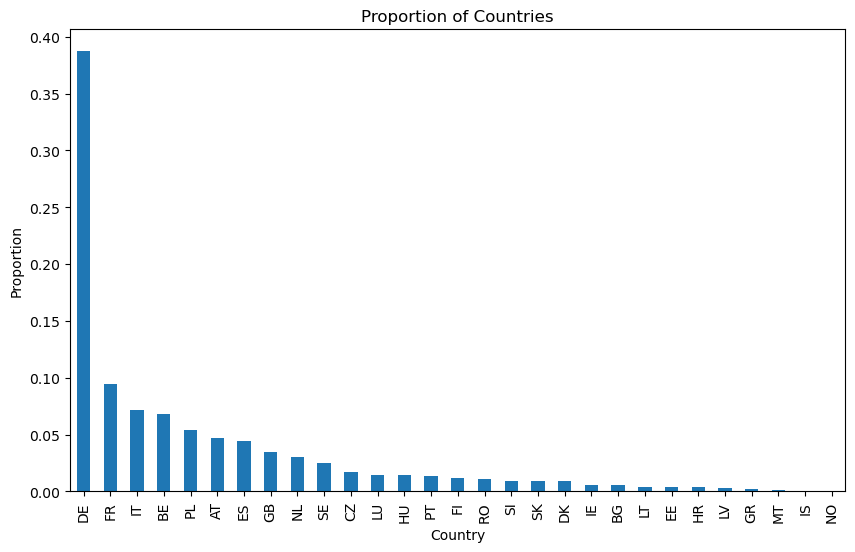

In [36]:
# Calculate the proportion of each country
country_proportions = df['Country'].value_counts(normalize=True)

# Bar plot for the proportions
plt.figure(figsize=(10, 6))
country_proportions.plot(kind='bar')
plt.title('Proportion of Countries')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

There are 28 countries, which are:

BE: Belgium
NL: Netherlands
IT: Italy
LV: Latvia
AT: Austria
IE: Ireland
ES: Spain
PT: Portugal
LU: Luxembourg
GB: United Kingdom
IS: Iceland
MT: Malta
BG: Bulgaria
DE: Germany
HU: Hungary
LT: Lithuania
GR: Greece
SK: Slovakia
SI: Slovenia
SE: Sweden
DK: Denmark
FR: France
PL: Poland
EE: Estonia
FI: Finland
HR: Croatia
CZ: Czech Republic
NO: Norway
RO: Romania


About manufacturers pool

In [37]:
# Get unique values for 'Mp'
unique_mp = df['Mp'].unique()

# Print the unique values
print("Unique mp:", unique_mp)

Unique mp: ['RENAULT' 'PSA-OPEL' 'VW GROUP PC' 'BMW GROUP' 'HONDA MOTOR EUROPE LTD'
 'TOYOTA-MAZDA' 'FORD-WERKE GMBH' 'DAIMLER AG' 'SUZUKI POOL' 'FCA-TESLA'
 'HYUNDAI' 'MITSUBISHI MOTORS' 'KIA' 'TATA MOTORS JAGUAR LAND ROVER'
 'MG-SAIC' 'VOLKSWAGEN' 'BMW' 'FORD' 'FCA' 'PSA' 'RENAULT-MITSUBISHI'
 'MERCEDES-BENZ' 'SUZUKI' 'STELLANTIS' 'VW-SAIC'
 'RENAULT-NISSAN-MITSUBISHI' 'MAZDA-SUBARU-SUZUKI-TOYOTA' 'TESLA'
 'TESLA-HONDA-JLR' 'HYUNDAI MOTOR EUROPE' 'SUBARU-SUZUKI-TOYOTA'
 'MERCEDES-BENZ AG' 'MAZDA' 'KG MOBILITY GREAT WALL MOTOR']


In [38]:
# Are there duplicates?

# Count the number of duplicate values in the 'Mp' column
num_duplicates_mp = df['Mp'].duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of duplicates
percentage_duplicates_mp = (num_duplicates_mp / total_rows) * 100

# Print the results
print("Number of duplicate values in 'Mp':", num_duplicates_mp)
print("Percentage of duplicate values in 'Mp':", percentage_duplicates_mp)

Number of duplicate values in 'Mp': 9096911
Percentage of duplicate values in 'Mp': 99.99962624815254


Mp along with other vehicle indentifiers variables: 
- Tan,
- T, Va, Ve, Mk (these ones belong together)

will be excluded: 1- it seems not pertinent for technical analysis set as objective of the project, 2 - We have spent already a huge amount of time in trying to decipher the signficance and impact of these variables for our dataset. Romain adviced us on Oct 10th to stop this time consuming endeavor and go for the categorical variables that we fully understand.    

In [39]:
# List of columns to remove
columns_to_remove = ['Mp', 'Tan', 'T', 'Va', 'Ve', 'Mk']

# Drop the specified columns
df = df.drop(columns=columns_to_remove, axis=1)

# Check summary

# Get the data types of each column
data_types = df.dtypes

# Get the number of unique values for each categorical column
unique_values = df.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df.shape

                    Data Type  Unique Values  Missing Values (%)
At1 (mm)                int64            NaN                 0.0
At2 (mm)                int64            NaN                 0.0
Cn                     object            NaN                 0.0
Country                object            NaN                 0.0
Cr                     object            NaN                 0.0
Fm                     object            NaN                 0.0
Ft                     object            NaN                 0.0
Fuel consumption      float32            NaN                 0.0
Mh                     object            NaN                 0.0
Mt                      int64            NaN                 0.0
W (mm)                  int64            NaN                 0.0
ec (cm3)                int64            NaN                 0.0
ep (KW)                 int64            NaN                 0.0
m (kg)                  int64            NaN                 0.0
target_Ewltp (g/km)     i

(9096945, 16)

In [40]:
# After checking  the latest changes,let's re-start:

# Inspecting the unique categories in each categorical column
for col in df.select_dtypes(include=['object']):
    num_categories = df[col].nunique()
    print(f"Column '{col}' has {num_categories} unique categorical values.")

Column 'Country' has 29 unique categorical values.
Column 'Mh' has 72 unique categorical values.
Column 'Cn' has 21762 unique categorical values.
Column 'Cr' has 4 unique categorical values.
Column 'Ft' has 20 unique categorical values.
Column 'Fm' has 9 unique categorical values.


Official company maker name = Mh

In [41]:
# About Mh (EU standard denomination)

# Get unique values for 'Mh'
unique_mh = df['Mh'].unique()

# Print the unique values
print("Unique mh:", unique_mh)

Unique mh: ['RENAULT' 'OPEL AUTOMOBILE' 'PORSCHE' 'BMW AG' 'HONDA MOTOR CO'
 'AUTOMOBILES PEUGEOT' 'TOYOTA' 'FORD WERKE GMBH' 'DAIMLER AG'
 'AUTOMOBILES CITROEN' 'SUZUKI MOTOR CORPORATION' 'ALFA ROMEO' 'MAZDA'
 'HYUNDAI' 'SEAT' 'VOLKSWAGEN' 'AUDI AG' 'FIAT GROUP' 'FORD INDIA'
 'CHRYSLER' 'DACIA' 'MAGYAR SUZUKI' 'HYUNDAI ASSAN' 'SKODA'
 'MITSUBISHI MOTORS CORPORATION' 'KIA' 'PSA' 'SUZUKI THAILAND'
 'KIA SLOVAKIA' 'HYUNDAI CZECH' 'JAGUAR LAND ROVER LIMITED'
 'FORD MOTOR COMPANY' 'AUDI SPORT' 'MITSUBISHI MOTORS THAILAND' 'OPEL'
 'MARUTI SUZUKI' 'BMW GMBH' 'AUDI HUNGARIA' 'MERCEDES AMG' 'TESLA'
 'MG MOTOR' 'HONDA UK' 'AVTOVAZ' 'ALPINE' 'ROLLS ROYCE' 'CNG TECHNIK'
 'FORD MOTOR AUSTRALIA' 'HYUNDAI EUROPE' 'BUGATTI' 'HONDA TURKIYE'
 'MERCEDES-BENZ AG' 'NISSAN' 'VOLVO' 'MAZDA EUROPE'
 'SAIC MOTOR CORPORATION' 'JIANGLING MOTOR' 'NEXT EGO MOBILE'
 'TOYOTA GAZOO RACING' 'LEVC' 'SUBARU' 'NISSAN AUTOMOTIVE EUROPE' 'GEELY'
 'BENTLEY' 'LAMBORGHINI' 'ROLLS-ROYCE' 'STELLANTIS AUTO'
 'TOYOTA MOTOR CORPO

The official name give by the EU contains subsidiaries and regional entities, i.a., MAGYAR SUZUKI, SUZUKI THAILAND, and MARUTI. 
I will try to gropu subsidiaries, divisions, or regional branches under their parent company name, so as to reduce noise and make the data more consistent. This approach should simplify the dataset and helps avoid biases introduced by having the same entity represented under multiple names.

In [42]:
# Define a dictionary to map various automaker names to their parent company

automaker_mapping = {
    'FORD WERKE GMBH': 'ford',
    'FORD INDIA': 'ford',
    'FORD MOTOR COMPANY': 'ford',
    'FORD MOTOR AUSTRALIA': 'ford',
    'BMW AG': 'BMW',
    'BMW GMBH': 'BMW',
    'AUDI AG': 'audi',
    'AUDI SPORT': 'audi',
    'AUDI HUNGARIA': 'audi',
    'SUZUKI MOTOR CORPORATION': 'suzuki',
    'MAGYAR SUZUKI': 'suzuki',
    'SUZUKI THAILAND': 'suzuki',
    'MARUTI SUZUKI': 'suzuki',
    'TOYOTA': 'toyota',
    'TOYOTA MOTOR CORPORATION': 'toyota',
    'TOYOTA GAZOO RACING': 'toyota',
    'ROLLS ROYCE': 'rolls-royce',
    'ROLLS-ROYCE': 'rolls-royce',
    'STELLANTIS AUTO': 'stellantis',
    'STELLANTIS EUROPE': 'stellantis',
    'MAZDA': 'mazda',
    'MAZDA EUROPE': 'mazda',
    'HYUNDAI' : 'hyundai',
    'HYUNDAI CZECH' : 'hyundai',
    'HYUNDAI EUROPE': 'hyundai',
    'HONDA UK': 'honda',
    'HONDA MOTOR CO': 'honda',
    'HONDA TURKIYE': 'honda',
    'HYUNDAI ASSAN':'hyundai',
    'MITSUBISHI MOTORS CORPORATION':'mitsubishi',
    'MITSUBISHI MOTORS THAILAND': 'mitshubishi',
    'MERCEDES-BENZ AG' : 'mercedes',
    'MERCEDES AMG': 'mercedes',
    'KIA SLOVAKIA': 'kia',
    'KIA': 'kia',
    'OPEL': 'opel',
    'OPEL AUTOMOBILE': 'opel',
    'NISSAN': 'nissan',
    'NISSAN AUTOMOTIVE EUROPE': 'nissan'}
    

# Apply the mapping to your dataframe
df['Mh'] = df['Mh'].replace(automaker_mapping)



In [43]:
# Find any automakers that are not in the mapping
unmapped_automakers = df[~df['Mh'].isin(automaker_mapping.values())]['Mh'].unique()
print(unmapped_automakers)

['RENAULT' 'PORSCHE' 'AUTOMOBILES PEUGEOT' 'DAIMLER AG'
 'AUTOMOBILES CITROEN' 'ALFA ROMEO' 'SEAT' 'VOLKSWAGEN' 'FIAT GROUP'
 'CHRYSLER' 'DACIA' 'SKODA' 'PSA' 'JAGUAR LAND ROVER LIMITED' 'TESLA'
 'MG MOTOR' 'AVTOVAZ' 'ALPINE' 'CNG TECHNIK' 'BUGATTI' 'VOLVO'
 'SAIC MOTOR CORPORATION' 'JIANGLING MOTOR' 'NEXT EGO MOBILE' 'LEVC'
 'SUBARU' 'GEELY' 'BENTLEY' 'LAMBORGHINI' 'SMART' 'FISKER' 'KG MOBILITY'
 'GREAT WALL MOTOR']


In [44]:
# Let's convert the all other automakers to lowercase for consistency
df['Mh'] = df['Mh'].apply(lambda x: x.lower() if x not in automaker_mapping.values() else x)

# Check the updated automakers
print(df['Mh'].unique())

['renault' 'opel' 'porsche' 'BMW' 'honda' 'automobiles peugeot' 'toyota'
 'ford' 'daimler ag' 'automobiles citroen' 'suzuki' 'alfa romeo' 'mazda'
 'hyundai' 'seat' 'volkswagen' 'audi' 'fiat group' 'chrysler' 'dacia'
 'skoda' 'mitsubishi' 'kia' 'psa' 'jaguar land rover limited'
 'mitshubishi' 'mercedes' 'tesla' 'mg motor' 'avtovaz' 'alpine'
 'rolls-royce' 'cng technik' 'bugatti' 'nissan' 'volvo'
 'saic motor corporation' 'jiangling motor' 'next ego mobile' 'levc'
 'subaru' 'geely' 'bentley' 'lamborghini' 'stellantis' 'smart' 'fisker'
 'kg mobility' 'great wall motor']


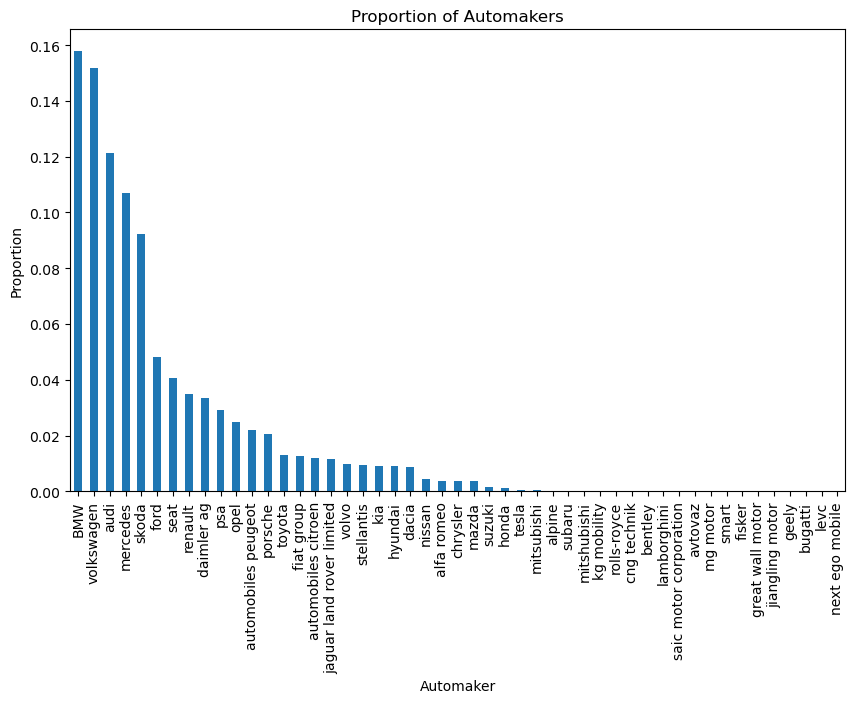

In [45]:
# Visualizing the proportion of each automaker

automaker_proportions = df['Mh'].value_counts(normalize=True)

# Create a bar plot for the proportions
plt.figure(figsize=(10, 6))
automaker_proportions.plot(kind='bar')
plt.title('Proportion of Automakers')
plt.xlabel('Automaker')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

In [55]:
#Saving what has been done

df_20192 = df
df_20192.to_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019d2.pkl')

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# reading the file
df=pd.read_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019d2.pkl')

display(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9096945 entries, 4209884 to 14442791
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Country              object 
 1   Mh                   object 
 2   Cn                   object 
 3   Cr                   object 
 4   m (kg)               int64  
 5   Mt                   int64  
 6   target_Ewltp (g/km)  int64  
 7   W (mm)               int64  
 8   At1 (mm)             int64  
 9   At2 (mm)             int64  
 10  Ft                   object 
 11  Fm                   object 
 12  ec (cm3)             int64  
 13  ep (KW)              int64  
 14  year                 int64  
 15  Fuel consumption     float32
dtypes: float32(1), int64(9), object(6)
memory usage: 1.1+ GB


None

About the commercial name of the vehicles = Cn

In [59]:
# Get unique values for 'Cn'
unique_Cn = df['Cn'].unique()

# Print the unique values
print("Unique Cn:", unique_Cn)

Unique Cn: ['TWINGO' 'CROSSLAND X' 'Macan' ... 'T-Roc' 'Cayenne Turbo E-Hybrid'
 'Spacetourer Van']


In [60]:
# Check for duplicates in the 'Cn' column

duplicates_cn = df['Cn'].duplicated()

# Count the number of duplicates
num_duplicates_cn = duplicates_cn.sum()

# Print the result
print("Number of duplicate values in 'Cn':", num_duplicates_cn)

df.shape

Number of duplicate values in 'Cn': 9075183


(9096945, 16)

The dataset contains a very high number of duplicates in the Cn column (9075183 out of 9096945). It makes sense, since it is counting the same vehicle type sold accross the entire EU.
That is, most vehicles have been registered multiple times.

In [48]:
# Is there any difference between tested CO2 emissions accross different countries of the same type of vehicle?

# Step 1: Identify duplicated vehicles based on the 'Cn' column
duplicates_in_cn = df[df.duplicated(subset='Cn', keep=False)]

# Step 2: Group by 'Cn' and 'Country' and get the target variable 'target_Ewltp (g/km)'
grouped_duplicates = duplicates_in_cn.groupby(['Cn', 'Country'])['target_Ewltp (g/km)'].unique()

# Step 3: Convert the grouped result to a DataFrame for better visualization
differences_df = grouped_duplicates.reset_index()

# Step 4: Check if there are differences in target_Ewltp values
# You can filter the results where there are multiple unique values in target_Ewltp
differences_df = differences_df[differences_df['target_Ewltp (g/km)'].apply(lambda x: len(x) > 1)]

# Print the results
print(differences_df)


                                                      Cn Country  \
0                                                             BE   
1                                                C 200 D      LU   
2                                                C 220 D      LU   
13                                                   ---      PL   
15                                                   108      AT   
16                                                   108      BE   
17                                                   108      BG   
18                                                   108      DE   
19                                                   108      DK   
20                                                   108      ES   
21                                                   108      FI   
22                                                   108      FR   
23                                                   108      GR   
24                                              

C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\4275831393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cn_counts.values, y=cn_counts.index, palette='viridis')


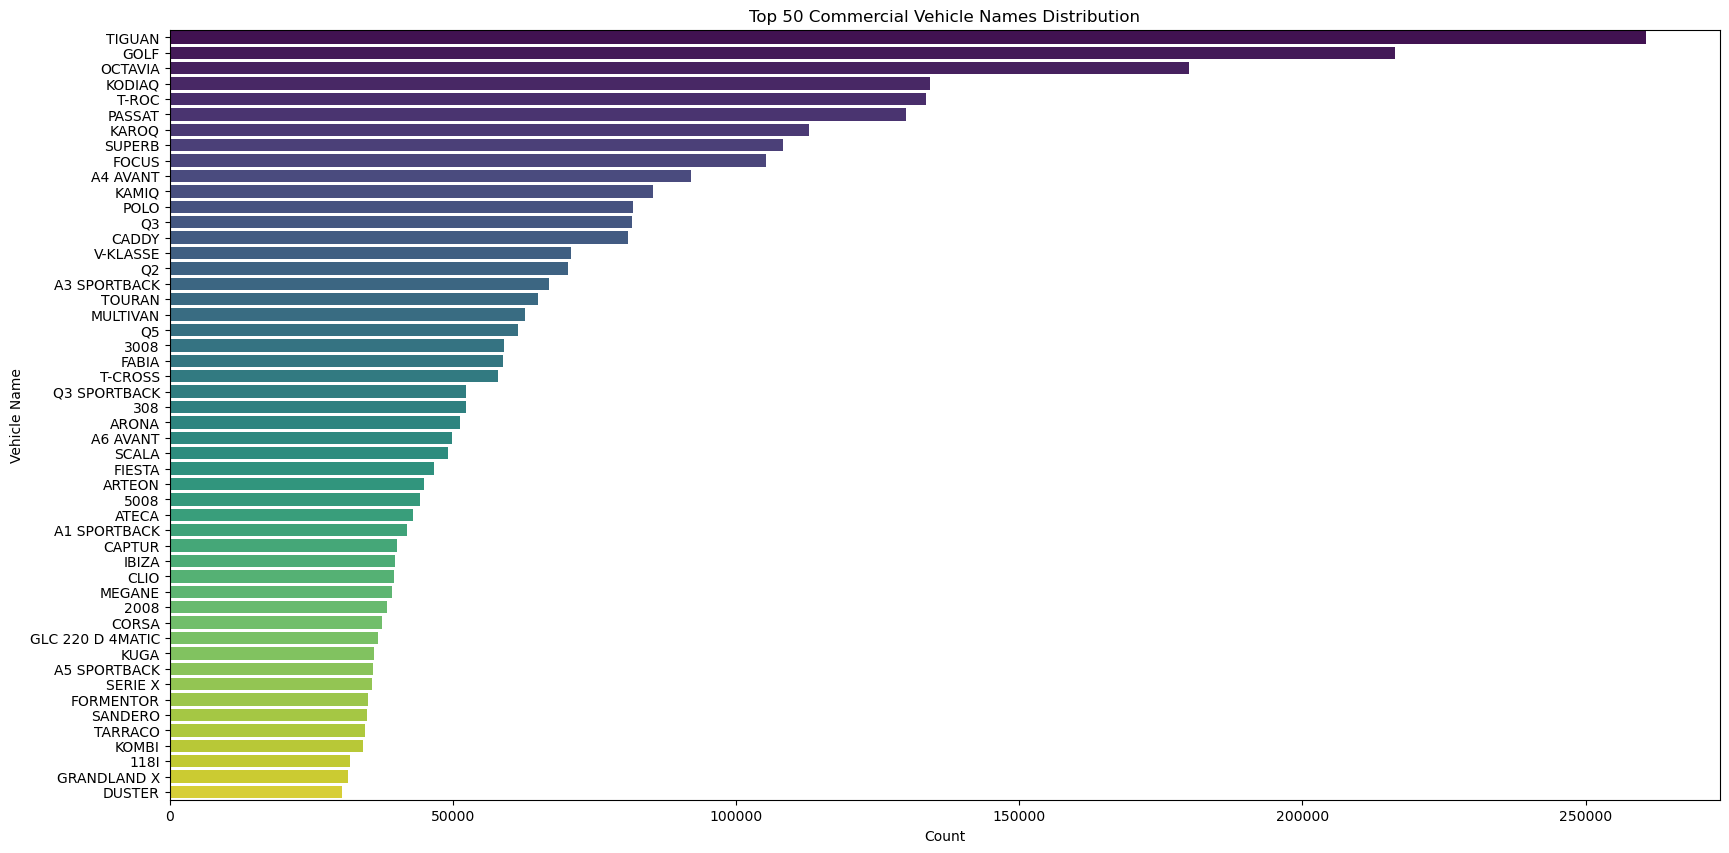

In [68]:
# Let's visualize

# Count occurrences of each vehicle name in 'Cn'
cn_counts = df['Cn'].value_counts().head(50)  # Get top 50 vehicle names

# Create a count plot
plt.figure(figsize=(20, 10))
sns.barplot(x=cn_counts.values, y=cn_counts.index, palette='viridis')
plt.title('Top 50 Commercial Vehicle Names Distribution')
plt.xlabel('Count')
plt.ylabel('Vehicle Name')
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\1761168040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cn_counts.values, y=cn_counts.index, palette='viridis')


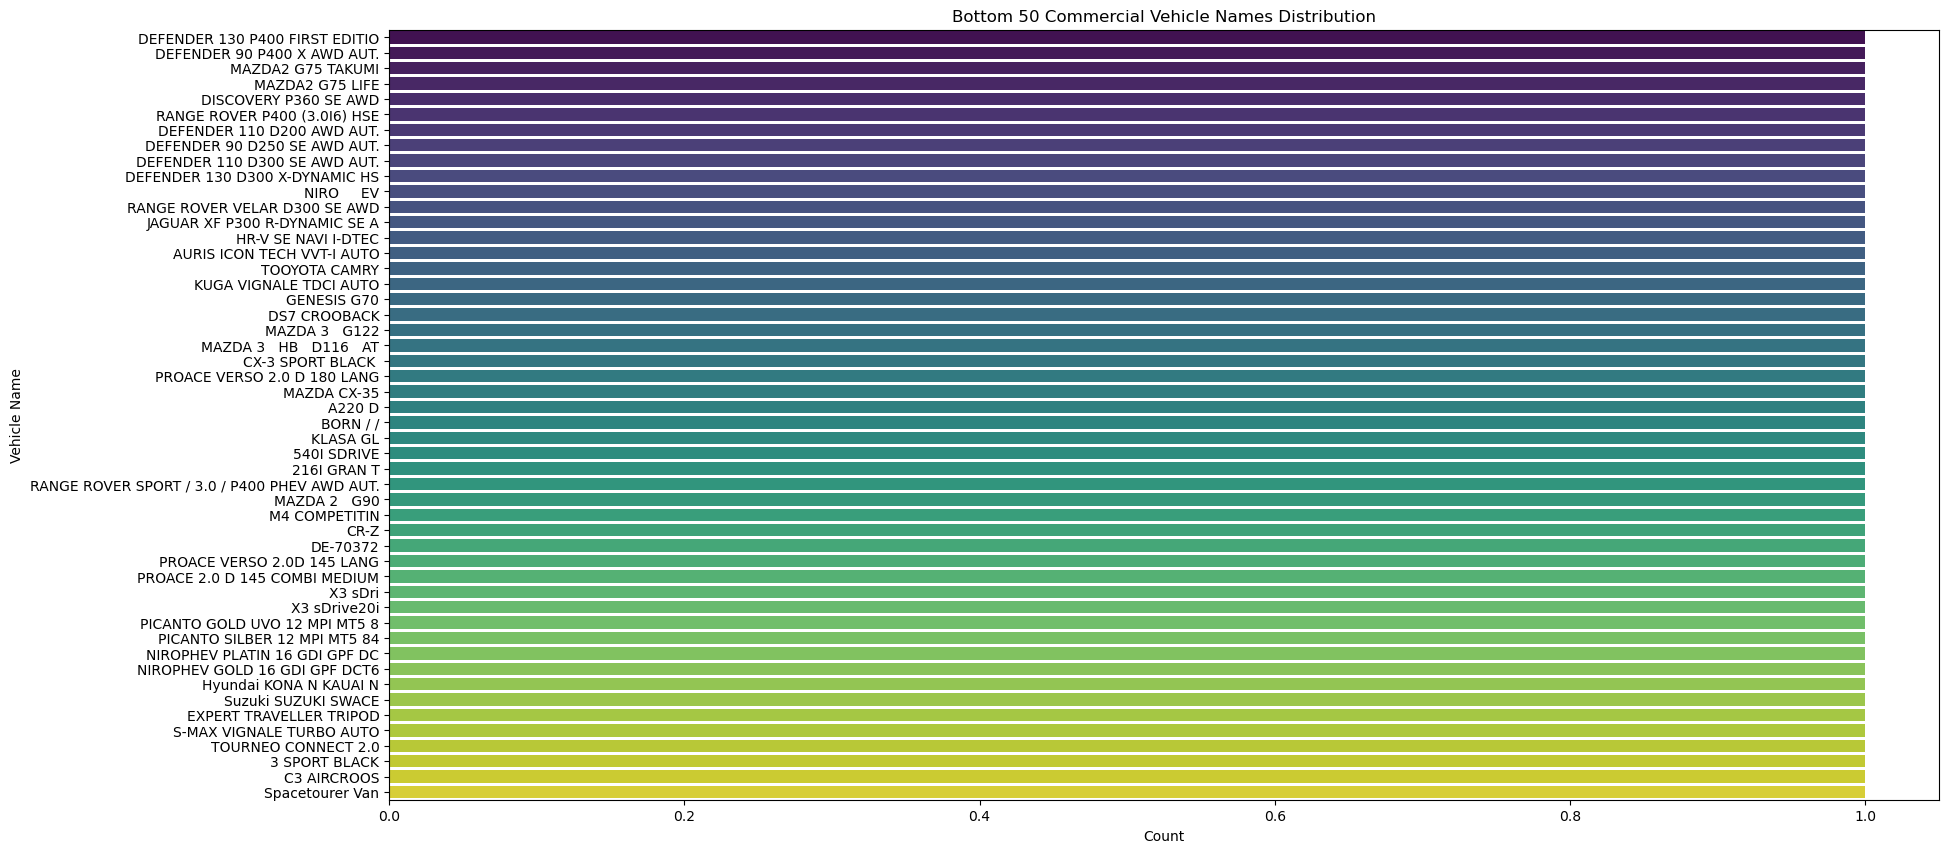

In [69]:
# Let's visualize

# Count occurrences of each vehicle name in 'Cn'
cn_counts = df['Cn'].value_counts().tail(50)  # Get bottom 50 vehicle names

# Create a count plot
plt.figure(figsize=(20, 10))
sns.barplot(x=cn_counts.values, y=cn_counts.index, palette='viridis')
plt.title('Bottom 50 Commercial Vehicle Names Distribution')
plt.xlabel('Count')
plt.ylabel('Vehicle Name')
plt.show()

The duplicate counting and visualizations suggest that there are probably issues with data quality. 

It makes sense to have duplicates, as they will be the same type of car sold accross Europe. However, we also see something like in row 61 and 62 show the following entrie

 116D 5-T?RER F40 B37
 116D 5-TUERER F20 B37

This should be another duplicated accounted for. 
There are also entries such like,  118 / / D AUT, 116d, etc. Are they really commercial names?

Spite of these deficiencies, it would interesting to see if there are any stastical significance of the same type of car sold accross Europe regarding the measurements of the target variable. 

In [86]:
# Testing the renaming of the target variable, in order to run the ANOVA test below

# Rename the column without converting to string
df.rename(columns={'target_Ewltp (g/km)': 'target_Ewltp'}, inplace=True)

# Print the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9096945 entries, 4209884 to 14442791
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Mh                 object 
 2   Cn                 object 
 3   m (kg)             int64  
 4   Mt                 int64  
 5   target_Ewltp       int64  
 6   W (mm)             int64  
 7   At1 (mm)           int64  
 8   At2 (mm)           int64  
 9   Ft                 object 
 10  Fm                 object 
 11  ec (cm3)           int64  
 12  ep (KW)            int64  
 13  year               int64  
 14  Fuel consumption   float32
dtypes: float32(1), int64(9), object(5)
memory usage: 1.1+ GB
None


In [62]:
# Testing for significance

# Step 1: Create a filtered DataFrame with vehicles sold in multiple countries
multi_country_vehicles = df.groupby('Cn').filter(lambda x: len(x['Country'].unique()) > 1)

# Step 2: Run ANOVA
# Here, using Cn as a group identifier
model = ols('target_Ewltp ~ C(Country)', data=multi_country_vehicles).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 3: Display ANOVA results
print(anova_table)

                  sum_sq         df             F  PR(>F)
C(Country)  1.259970e+09       28.0  15273.567201     0.0
Residual    2.471449e+10  8388610.0           NaN     NaN


Interpretation: 

Null Hypothesis: Regarding the CO2 emission tests (target_Elwtp) there is no difference of the same vehicle (duplicates of Cn) sold accross the 29 countries in the period 2019-2023
Alternative Hypothesis: There is a difference. 

***

C(Country): This is the sum of squares due to the countries (the variation explained by the country groups). A higher value indicates that the countries contribute a significant amount to the variability in the target variable.

A higher F-statistic suggests that the group means are different from each other. The F-value is 15273.567201, which is very large.

PR(>F) (p-value): This value indicates the probability of observing an F-statistic as extreme as the one calculated (or more extreme) if the null hypothesis is true (the null hypothesis states that there are no differences in means across groups). A very small p-value (close to 0) indicates strong evidence against the null hypothesis.

The p-value is 0.0, which is less than any common significance level (like 0.05 or 0.01), suggesting that we can reject the null hypothesis.

All in all:

- Statistical Significance: There are significant differences in the mean target_Ewltp (g/km) values across the different countries.
- Effect Size: The sum of squares for C(Country) is substantially larger than that for the residuals, indicating that country explains a significant amount of variability in the target variable.

***

Let's perform a post-hoc tests (Tukey's HSD) to identify which specific countries differ from each other

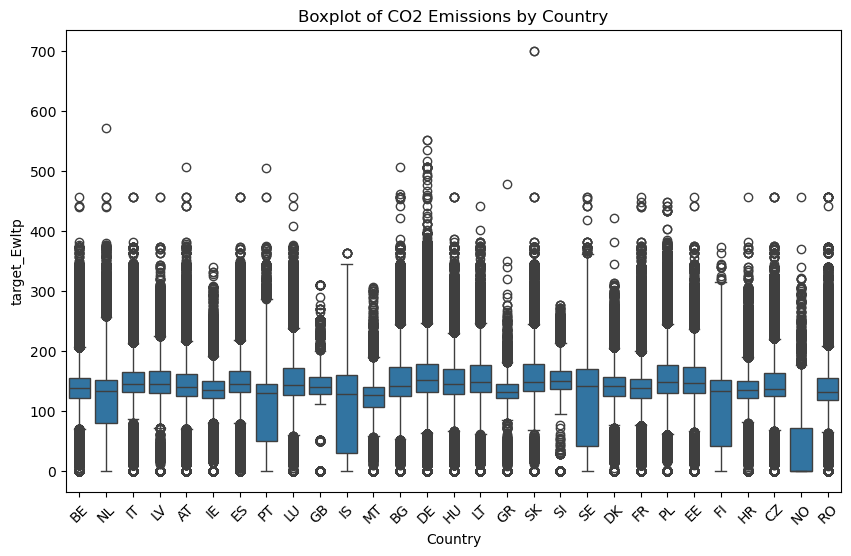

In [65]:
# Convert the results to a DataFrame for easier manipulation

tukey_result = pairwise_tukeyhsd(endog=multi_country_vehicles['target_Ewltp'],
                                  groups=multi_country_vehicles['Country'],
                                  alpha=0.05)

# Display the results
#print(tukey_result)

# Create a plot to visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='target_Ewltp', data=multi_country_vehicles)
plt.title('Boxplot of CO2 Emissions by Country')
plt.xticks(rotation=45)
plt.show()

Given the different proportion of countries present in the dataset, the apparently approximate median value among countries regarding the target variable in spite that there are significant different with the same cars, it will probably make sense to focus on the big 5-10 countries instead of 28. This is to be analyzed and decided later. 

Category of vehicle registered (Cr) 

The categories should be : 

M1: Vehicles used for carriage of passengers, comprising not more than eight seats in addition to the driver's = 9
N1: Power-driven vehicles having at least four wheels and used for the carriage of goods (not exceeding 3.5 tonnes)


In [70]:
# Get unique values for 'Cr'
unique_Cr = df['Cr'].unique()

# Print the unique values
print("Unique Cr:", unique_Cr)

Unique Cr: ['M1' 'M1G' 'm1' 'M1 ']


C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\911632638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_cr_counts.index, y=filtered_cr_counts.values, palette='viridis')


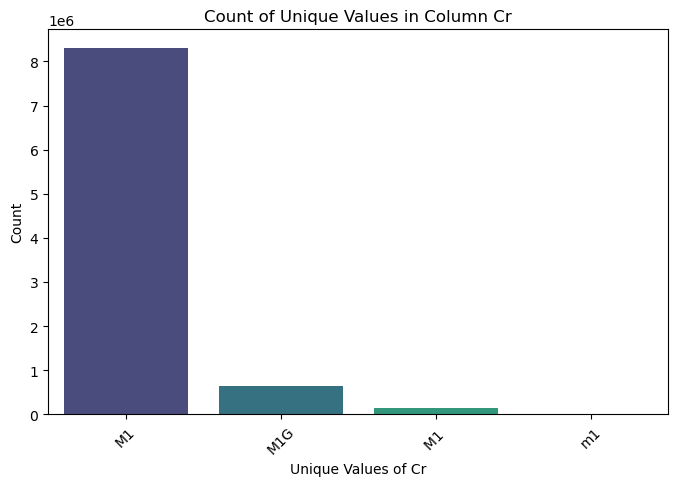

In [71]:
# Create a filtered DataFrame for the unique values you want to visualize
unique_cr_values = ['M1', 'M1G', 'm1', 'M1 ']
cr_counts = df['Cr'].value_counts()

# Filter the counts to only include the unique values of interest
filtered_cr_counts = cr_counts[cr_counts.index.isin(unique_cr_values)]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=filtered_cr_counts.index, y=filtered_cr_counts.values, palette='viridis')
plt.title('Count of Unique Values in Column Cr')
plt.xlabel('Unique Values of Cr')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

This merely shows that the entire dataset contains passenger vehicles. The variable will be dropped. 

In [72]:
# List of columns to remove
columns_to_remove = ['Cr']

# Drop the specified columns
df = df.drop(columns=columns_to_remove, axis=1)

# Check summary

# Get the data types of each column
data_types = df.dtypes

# Get the number of unique values for each categorical column
unique_values = df.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df.shape

                    Data Type  Unique Values  Missing Values (%)
At1 (mm)                int64            NaN                 0.0
At2 (mm)                int64            NaN                 0.0
Cn                     object            NaN                 0.0
Country                object            NaN                 0.0
Fm                     object            NaN                 0.0
Ft                     object            NaN                 0.0
Fuel consumption      float32            NaN                 0.0
Mh                     object            NaN                 0.0
Mt                      int64            NaN                 0.0
W (mm)                  int64            NaN                 0.0
ec (cm3)                int64            NaN                 0.0
ep (KW)                 int64            NaN                 0.0
m (kg)                  int64            NaN                 0.0
target_Ewltp (g/km)     int64            NaN                 0.0
year                    i

(9096945, 15)

- Fuel type (Ft): It will be retained. Entries: Petrol, Diesel, LGP, NG, Hydrogen, LPG, NG-biomethane, E85, Electric. Combination with electricity: Petrol/Electric, E85/Electric, Diesel/Electric, Hydrogen/Electric


In [73]:
# Get unique values for 'Ft'
unique_Ft = df['Ft'].unique()

# Print the unique values
print("Unique Ft:", unique_Ft)

Unique Ft: ['petrol' 'diesel' 'petrol/electric' 'ng' 'lpg' 'ng-biomethane' 'e85'
 'electric' 'diesel/electric' 'hydrogen' 'DIESEL' 'ELECTRIC'
 'PETROL/ELECTRIC' 'NG-BIOMETHANE' 'PETROL' 'NG' 'LPG' 'DIESEL/ELECTRIC'
 'HYDROGEN' 'E85']


In [92]:
# Lets bring consistency in.
# Define the mapping for standardization
mapping = {
    'DIESEL': 'diesel',
    'diesel': 'diesel',
    'Gasoline': 'gasoline',
    'GASOLINE': 'gasoline',
    'petrol': 'gasoline',
    'PETROL': 'gasoline',
    'ELECTRIC':'electric',
    'hybrid': 'hybrid',
    'HYBRID': 'hybrid',
    'CNG': 'cng',
    'LPG': 'lpg',
    'Ethanol': 'ethanol',
    'PETROL/ELECTRIC':'gasoline/electric',
    'E85': 'ethanol',
    'e85' : 'ethanol',
    'ng' : 'natural gas',
    'NG' : 'natural gas',
    'NG-BIOMETHANE' : 'natural gas/biomethane',
    'ng-biomethane' : 'natural gas/biomethane',
    'DIESEL/ELECTRIC' : 'diesel/electric',
    'HYDROGEN' : 'hydrogen',
    'lpg' : 'liquefied petroleum gas',
    'petrol/electric': 'gasoline/electric'
    # Add any other mappings as needed
}

# Apply the mapping to the 'Ft' column
df['Ft'] = df['Ft'].replace(mapping)

# Check the unique values after mapping
unique_Ft_after = df['Ft'].unique()
print("Unique Ft after mapping:", unique_Ft_after)

Unique Ft after mapping: ['gasoline' 'diesel' 'gasoline/electric' 'natural gas'
 'liquefied petroleum as' 'natural gas/biomethane' 'ethanol' 'electric'
 'diesel/electric' 'hydrogen']


C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\901249214.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_ft_counts.index, y=filtered_ft_counts.values, palette='viridis')


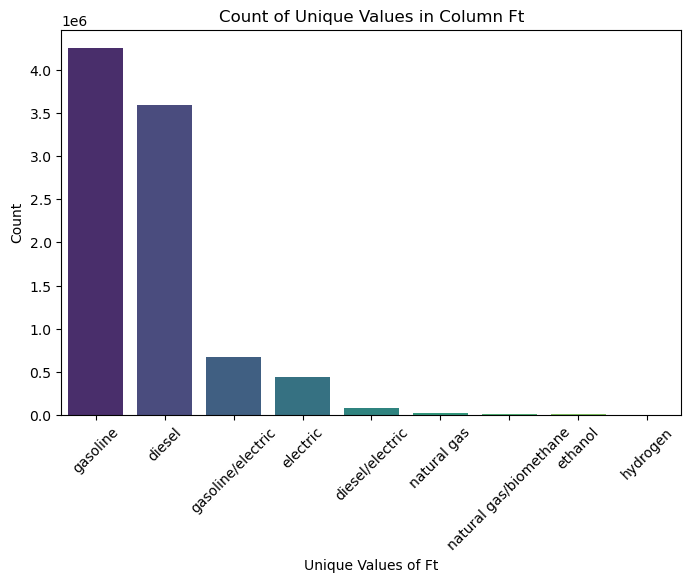

In [93]:
# Create a filtered DataFrame for the unique values you want to visualize
unique_ft_values = [
    'gasoline', 
    'diesel', 
    'natural gas',
    'liquefied petroleum gas', 
    'natural gas/biomethane', 
    'ethanol', 
    'electric',
    'diesel/electric', 
    'hydrogen', 
    'gasoline/electric'
]

ft_counts = df['Ft'].value_counts()

# Filter the counts to only include the unique values of interest
filtered_ft_counts = ft_counts[ft_counts.index.isin(unique_ft_values)]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=filtered_ft_counts.index, y=filtered_ft_counts.values, palette='viridis')
plt.title('Count of Unique Values in Column Ft')
plt.xlabel('Unique Values of Ft')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

                sum_sq         df             F  PR(>F)
C(Ft)     1.847433e+10        9.0  1.920081e+06     0.0
Residual  9.725273e+09  9096935.0           NaN     NaN


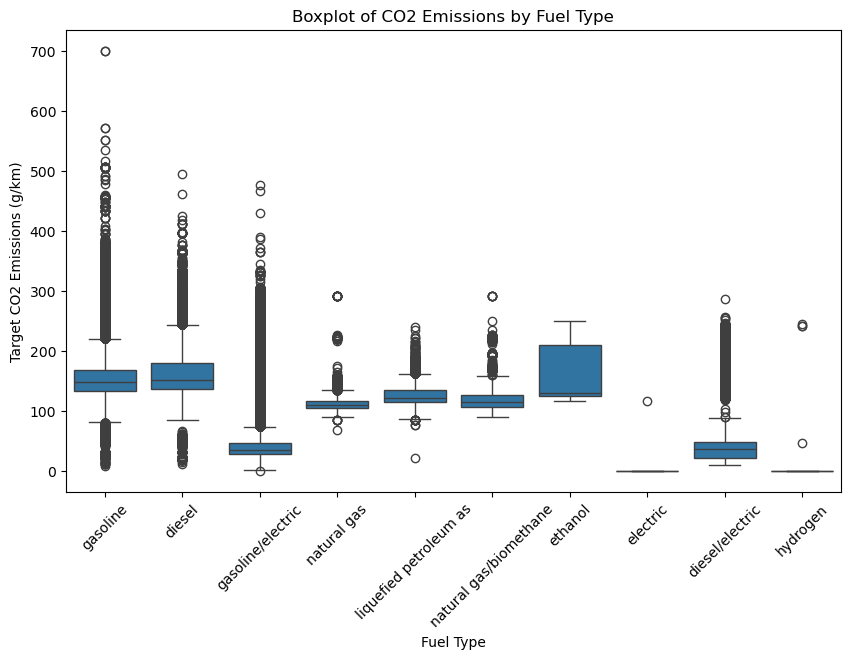

In [94]:
# Checking for statistical significance

model = ols('target_Ewltp ~ C(Ft)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Optional: Visualize the distribution of target_Ewltp for each fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ft', y='target_Ewltp', data=df)
plt.title('Boxplot of CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Target CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

Summary statistics for target_Ewltp in specified fuel types:
count    1.110979e+06
mean     2.521325e+01
std      2.854035e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.600000e+01
75%      3.800000e+01
max      4.760000e+02
Name: target_Ewltp, dtype: float64


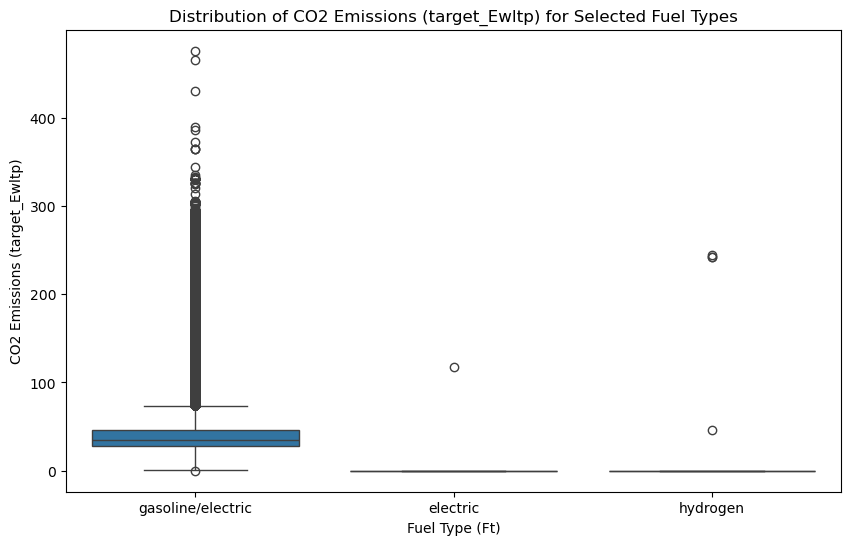

In [95]:
# Define the fuel types of interest
fuel_types_of_interest = ['electric', 'hydrogen', 'gasoline/electric']

# Filter the DataFrame
filtered_df = df[df['Ft'].isin(fuel_types_of_interest)]

# Display summary statistics for target_Ewltp
summary_stats = filtered_df['target_Ewltp'].describe()
print("Summary statistics for target_Ewltp in specified fuel types:")
print(summary_stats)

# Optional: Visualize the distribution of target_Ewltp for these fuel types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ft', y='target_Ewltp', data=filtered_df)
plt.title('Distribution of CO2 Emissions (target_Ewltp) for Selected Fuel Types')
plt.xlabel('Fuel Type (Ft)')
plt.ylabel('CO2 Emissions (target_Ewltp)')
plt.show()

In [96]:
#As expected, we can reject the Null Hypothesis (that there is no difference in CO2 emissions (target_Ewltp) across different fuel types (Ft)). 
#Rows with fuel type: electric and hydrogen can probably be removed. 

# Define the fuel types to remove
fuel_types_to_remove = ['electric', 'hydrogen']

# Filter the DataFrame to exclude rows with those fuel types
df_filtered = df[~df['Ft'].isin(fuel_types_to_remove)]

# Display the shape of the new DataFrame to verify the number of rows remaining
print(f"New dataset shape: {df_filtered.shape}")


New dataset shape: (8662354, 15)


- Fuel mode (Fm): It will be retained. Permitted entries: M, B, F, E,P,H (see page 17.Guidelines)

In [97]:
# Get unique values for 'Ft'
unique_Fm = df['Fm'].unique()

# Print the unique values
print("Unique Fm:", unique_Fm)

Unique Fm: ['M' 'H' 'P' 'F' 'E' 'B' 'm' 'h' 'p']


In [98]:
# Define the mapping for the Fm column
fm_mapping = {
    'M': 'mono_fuel',
    'm': 'mono_fuel',
    'H': 'not_off',
    'h': 'non_off_charging_hybrids',
    'P': 'off_charging_hybrids',
    'p': 'off_charging_hybrids',
    'F': 'flex_fuel',
    'E': 'battery_electric',
    'B': 'bi_fuel'
}

# Apply the mapping to the Fm column
df['Fm'] = df['Fm'].map(fm_mapping)

# Verify the changes by printing the unique values in the Fm column
print("Unique values in 'Fm' after mapping:", df['Fm'].unique())

Unique values in 'Fm' after mapping: ['mono_fuel' 'not_off' 'off_charging_hybrids' 'flex_fuel'
 'battery_electric' 'bio_fuel' 'non_off_charging_hybrids']


C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\20493467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fm', palette='viridis')


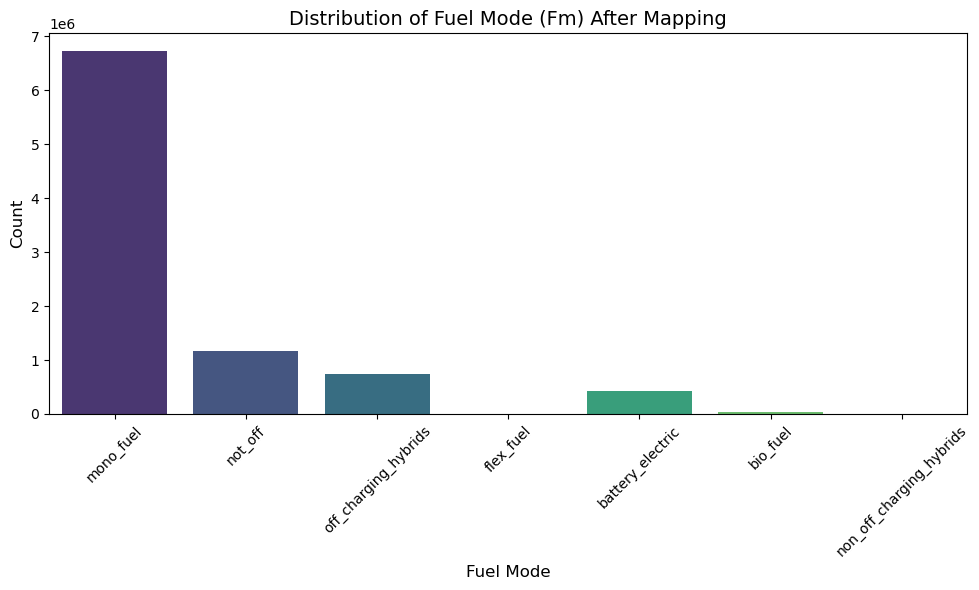

In [99]:
# Create a bar plot for the updated 'Fm' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fm', palette='viridis')

# Add title and labels
plt.title('Distribution of Fuel Mode (Fm) After Mapping', fontsize=14)
plt.xlabel('Fuel Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
# Count the instances of each unique value in the 'Fm' column
fm_counts = df['Fm'].value_counts()

# Calculate the percentage of each unique value in the 'Fm' column
fm_percentage = df['Fm'].value_counts(normalize=True) * 100

# Combine both counts and percentage into a DataFrame for better visualization
fm_summary = pd.DataFrame({'Count': fm_counts, 'Percentage (%)': fm_percentage})

# Display the summary
print(fm_summary)

                            Count  Percentage (%)
Fm                                               
mono_fuel                 6720495       73.876395
not_off                   1162240       12.776157
off_charging_hybrids       749525        8.239305
battery_electric           434433        4.775592
bio_fuel                    28988        0.318656
flex_fuel                    1261        0.013862
non_off_charging_hybrids        3        0.000033


                             count        mean        std    min    25%  \
Fm                                                                        
battery_electric          434433.0    0.000269   0.177511    0.0    0.0   
bio_fuel                   28988.0  122.968021  16.191745    0.0  112.0   
flex_fuel                   1261.0  155.657415  37.824532  116.0  120.0   
non_off_charging_hybrids       3.0  160.000000  74.478185  117.0  117.0   
off_charging_hybrids      749525.0   41.481574  27.093009    0.0   28.0   

                            50%    75%    max  
Fm                                             
battery_electric            0.0    0.0  117.0  
bio_fuel                  120.0  131.0  291.0  
flex_fuel                 130.0  188.0  250.0  
non_off_charging_hybrids  117.0  181.5  246.0  
off_charging_hybrids       35.0   46.0  476.0  


C:\Users\alexa\AppData\Local\Temp\ipykernel_15280\1788108719.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fm', y='target_Ewltp', data=filtered_df, palette='Set2')


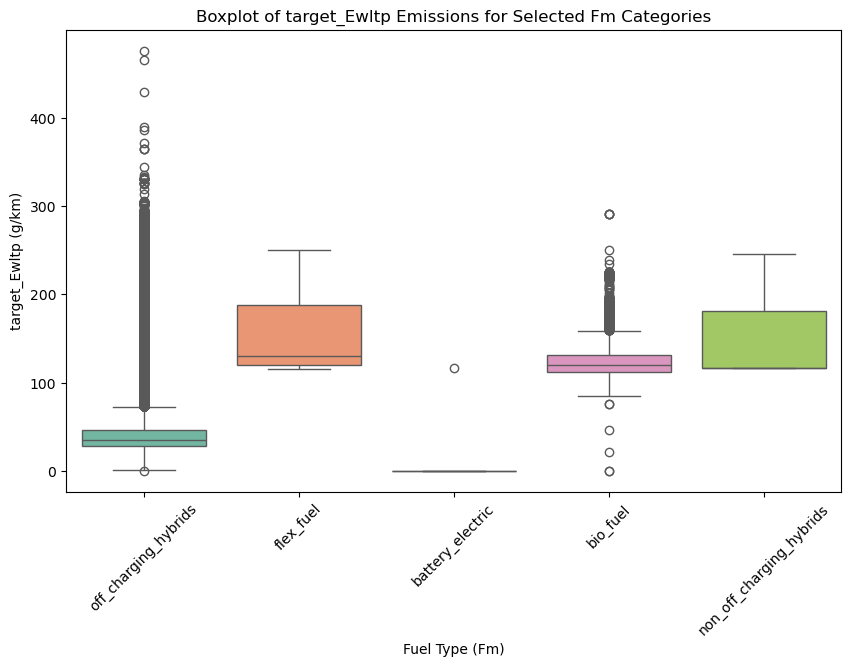

In [101]:
# Filter the dataframe to include only the specific Fm categories
selected_categories = ['non_off_charging_hybrids', 'flex_fuel', 'bio_fuel', 'battery_electric', 'off_charging_hybrids']
filtered_df = df[df['Fm'].isin(selected_categories)]

# Display summary statistics (mean, median) for each category in Fm
summary_statistics = filtered_df.groupby('Fm')['target_Ewltp'].describe()
print(summary_statistics)

# Alternatively, plot a boxplot to visualize the distribution of Ewltp emissions for these categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fm', y='target_Ewltp', data=filtered_df, palette='Set2')
plt.title('Boxplot of target_Ewltp Emissions for Selected Fm Categories')
plt.xlabel('Fuel Type (Fm)')
plt.ylabel('target_Ewltp (g/km)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 1: Fit the ANOVA model
anova_model = ols('target_Ewltp ~ C(Fm)', data=df).fit()

# Step 2: Perform ANOVA
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Step 3: Display the ANOVA table
print(anova_table)

Based on the facts above the following rows can be removed:

- Battery_electric: zero target emissions

Altough non_off_charging_hybrids, flex_fuel, and bio_fuel has just a minimal presence in the dataset, tests show that they do emit co2 (probably significantly so).  


In [1]:
# Define the fuel types to remove
fuel_modes_to_remove = ['battery_electric']

# Filter the DataFrame to exclude rows with those fuel types
df_filtered = df[~df['Fm'].isin(fuel_modes_to_remove)]

# Getting the summary

# Get the data types of each column
data_types = df.dtypes

# Get the number of unique values for each categorical column
unique_values = df.select_dtypes(include='category').nunique()

# Get the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Print the summary DataFrame
print(summary_df)

df.shape


NameError: name 'df' is not defined

In [104]:
#Saving what has been done

df_2019d3 = df
df_2019d3.to_pickle(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\df_2019d3.pkl')

# 4- Conclusion: Data Cleaning and Preprocessing

This notebook aimed to prepare a clean and usable dataset for machine learning analysis. Several variables were excluded due to their limited relevance or redundancy. Categorical variables were standardized and renamed to ensure consistency. Significant effort was invested in understanding aggregated categorical variables, such as vehicle identifiers and manufacturer pools. However, due to time constraints and the project's specific goals, these variables were ultimately excluded.

All numerical variables were retained. Missing values were handled through imputation (mean or median) or removal, as appropriate. To focus on recent trends and potential impacts of new legislation, the analysis was limited to data from 2019 onwards, coinciding with the introduction of the WLTP standard. Additionally, variables related to electric vehicles, such as electric range and eco-innovation indicators, were excluded. While these variables might be of interest in certain contexts, they were deemed less relevant for the current research due to their high rate of missing values and the project's specific focus.

Research Questions for Future Analysis

Given the dataset's geographical scope, future research could explore:

- Country-Specific Analysis: Whether to focus on a subset of countries, such as Germany, France, Italy, Belgium, and Poland, which represent a significant portion of the data.
- Manufacturer Focus: Whether to concentrate on major automakers like BMW, Volkswagen, Audi, Mercedes, Skoda, Ford, Seat, and Renault, which dominate the market.
- Commercial Name Analysis: The potential value of the "commercial name" variable for analyzing variations across countries, considering the potential limitations of data quality.
Further exploration of electric vehicle-related variables and their impact on CO2 emissions could also be considered for future studies.

The second juypter book will handle modelization


** Copy of an excel file**

Name	Definition	Remove (0)/retained(1)
ID	Identification number.	0
MS	Member state.	1
Mp	Manufacturer pooling.	0
VFN	Vehicle family identification number.	1
Mh	Manufacturer name EU standard denomination .	1
Man	Manufacturer name OEM declaration.	0
MMS	Manufacturer name MS registry denomination .	0
TAN	Type approval number.	0
T	Type.	0
Va	Variant.	0
Ve	Version.	0
Mk	Make.	0
Cn	Commercial name.	0
Ct	Category of the vehicle type approved.	0
Cr	Category of the vehicle registered.	1
M (kg)	Mass in running order Completed/complete vehicle .	1
Mt	WLTP test mass.	1
Enedc (g/km)	Specific CO2 Emissions (NEDC).	0
Ewltp (g/km)	Specific CO2 Emissions (WLTP).	1
W (mm)	Wheel Base.	1
At1 (mm)	Axle width steering axle.	1
At2 (mm)	Axle width other axle.	1
Ft	Fuel type.	1
Fm	Fuel mode.	1
Ec (cm3)	Engine capacity.	1
Ep (KW)	Engine power.	1
Z (Wh/km)	Electric energy consumption.	0
IT	Innovative technology or group of innovative technologies.	0
Ernedc (g/km)	Emissions reduction through innovative technologies.	0
Erwltp (g/km)	Emissions reduction through innovative technologies (WLTP).	0
De	Deviation factor.	0
Vf	Verification factor.	0
R	Total new registrations.	0
Year	Reporting year.	1
Status	P = Provisional data, F = Final data.	0
Version_file	Internal versioning of deliverables.	0
E (g/km)	Specific CO2 Emission. Deprecated value, only relevant for data until 2016.	0
Er (g/km)	Emissions reduction through innovative technologies. Deprecated value, only relevant for data until 2016.	0
Zr	Electric range.	0
Dr	Registration date.	0
Fc	Fuel consumption.	1
